In [3]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

from generators import BlockDiagonalMatrixGenerator, BlockMatrixGenerator
from datasets import MovieLensGenreCastUserData
from models.cmf_vincent.anewton import *
from models.cmf_vincent.utils import *
from models.cmf_vincent.cmf import *

import numpy as np
import time
import logging
import scipy.sparse

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
class Args():
    def __init__(self, k, iter, user=0, item=0):
        self.train = "../models/cmf_vincent/data/ml-1m/train.txt"
        self.test = "../models/cmf_vincent/data/ml-1m/test.txt"
        self.item = "../models/cmf_vincent/data/ml-1m/item.txt" if item > 0 else ""
        self.user = "../models/cmf_vincent/data/ml-1m/user.txt" if user > 0 else ""
        self.out = "../output/out-cmf.txt"
        self.link = 'log_dense'
        self.alphas = '0.4'
        if user > 0:
            self.alphas += '-' + str(user)
        if item > 0:
            self.alphas += '-' + str(item)
        self.k = k
        self.reg = 0.1
        self.lr = 0.1
        self.iter = iter
        self.tol = 0.0
        self.verbose = True
        self.boolean = True
        
args = Args(k=15, iter=150, user=0, item=0.2)

In [5]:
[Xs_trn, Xs_tst, rc_schema, modes] = read_triple_data(args.train, args.test, args.user, args.item, args.link, args.boolean)

display(Xs_trn, Xs_tst)

[<6040x3883 sparse matrix of type '<class 'numpy.int32'>'
 	with 900188 stored elements in Compressed Sparse Column format>,
 <3883x99 sparse matrix of type '<class 'numpy.float64'>'
 	with 10291 stored elements in Compressed Sparse Column format>]

[<6040x3883 sparse matrix of type '<class 'numpy.int32'>'
 	with 100021 stored elements in Compressed Sparse Column format>,
 None]

In [6]:
data = MovieLensGenreCastUserData(size='100k')
data.load()
data.Xs

[<943x1682 sparse matrix of type '<class 'numpy.int32'>'
 	with 100000 stored elements in Compressed Sparse Row format>,
 <943x81 sparse matrix of type '<class 'numpy.float64'>'
 	with 3499 stored elements in Compressed Sparse Row format>,
 <26x1682 sparse matrix of type '<class 'numpy.float64'>'
 	with 4031 stored elements in Compressed Sparse Row format>,
 <4708x1682 sparse matrix of type '<class 'numpy.float64'>'
 	with 8306 stored elements in Compressed Sparse Row format>]

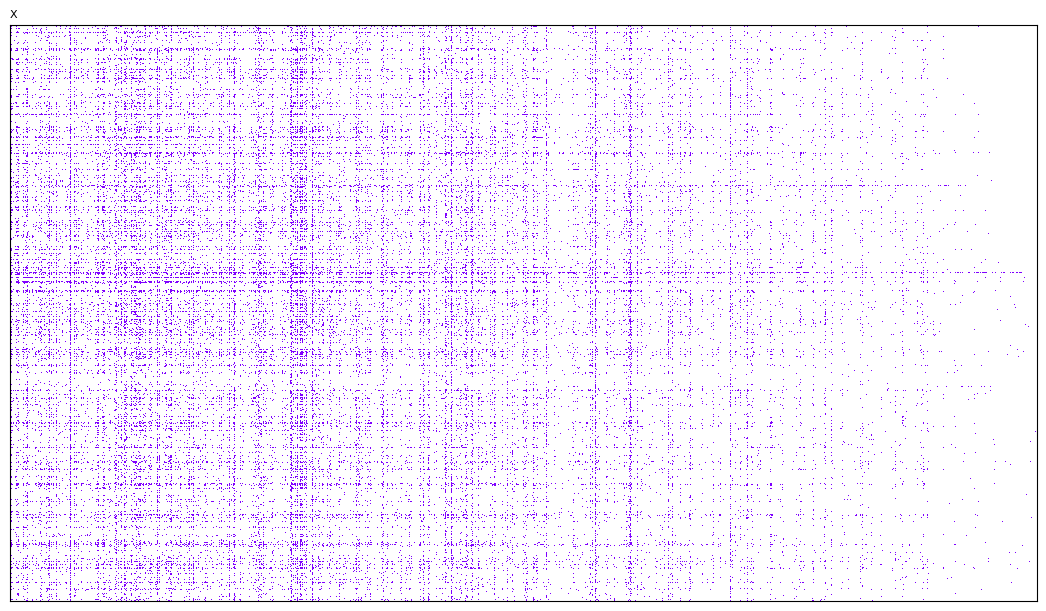

In [7]:
X, W, Y, Z = data.Xs

show_matrix([(X, [0, 0], 'X')])

[INFO] ------------------- CMF -------------------
[INFO] Data: Number of instnace for each entity = [943, 1682, 26]
[INFO] Data: Training size = 100000. Testing size = 100000
[INFO] Settings: k = 15. reg = 0.1. lr = 0.1. alpha = [0.4, 0.2]. modes = ['sparse', 'log_dense'].
[INFO] Iter 1/150. Time: 1.2
[INFO] trn rmse: 1.00 tpr: 0.00 ppv: 1.00 acc: 0.94 f1: 0.00 loss: 42271.9 (change -0.94%)
[INFO] tst rmse: 1.00 tpr: 0.00 ppv: 1.00 acc: 0.94 f1: 0.00
[INFO] Iter 2/150. Time: 0.6
[INFO] trn rmse: 1.00 tpr: 0.00 ppv: 1.00 acc: 0.94 f1: 0.00 loss: 41833.6 (change -1.04%)
[INFO] tst rmse: 1.00 tpr: 0.00 ppv: 1.00 acc: 0.94 f1: 0.00
[INFO] Iter 3/150. Time: 0.6
[INFO] trn rmse: 1.00 tpr: 0.00 ppv: 1.00 acc: 0.94 f1: 0.00 loss: 41388.6 (change -1.06%)
[INFO] tst rmse: 1.00 tpr: 0.00 ppv: 1.00 acc: 0.94 f1: 0.00
[INFO] Iter 4/150. Time: 0.5
[INFO] trn rmse: 1.00 tpr: 0.00 ppv: 1.00 acc: 0.94 f1: 0.00 loss: 40986.1 (change -0.97%)
[INFO] tst rmse: 1.00 tpr: 0.00 ppv: 1.00 acc: 0.94 f1: 0.00
[

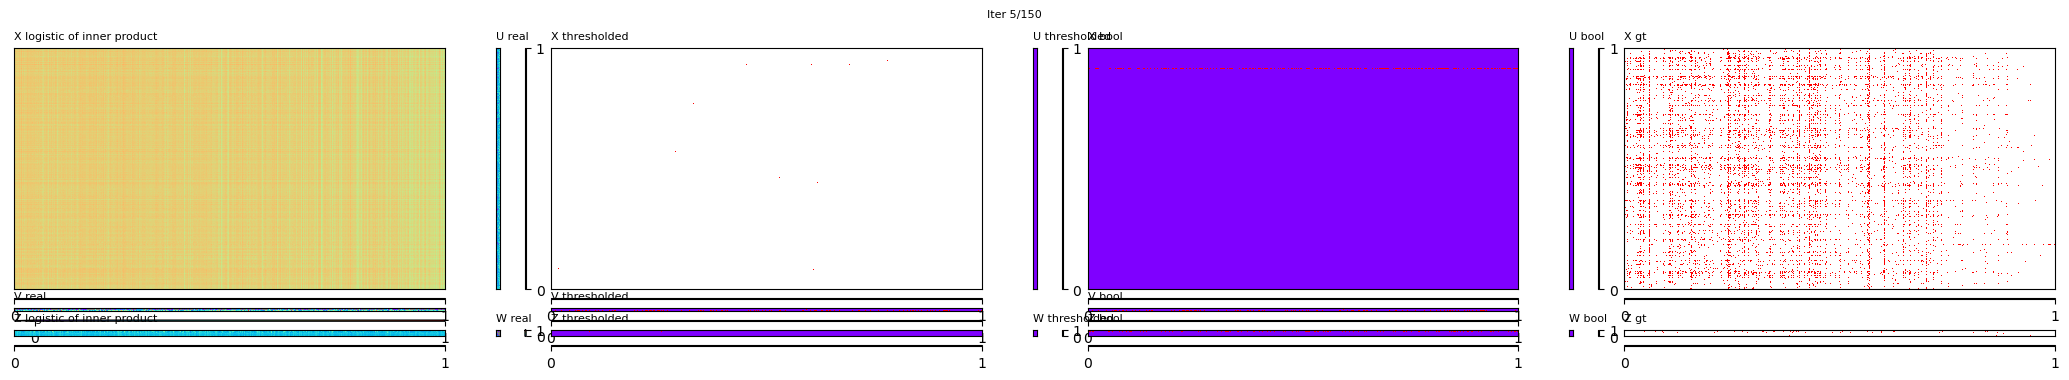

[INFO] Iter 6/150. Time: 0.8
[INFO] trn rmse: 0.99 tpr: 0.02 ppv: 1.00 acc: 0.94 f1: 0.04 loss: 39867.1 (change -1.61%)
[INFO] tst rmse: 0.99 tpr: 0.02 ppv: 1.00 acc: 0.94 f1: 0.04
[INFO] Iter 7/150. Time: 0.5
[INFO] trn rmse: 0.98 tpr: 0.04 ppv: 1.00 acc: 0.94 f1: 0.07 loss: 39003.1 (change -2.17%)
[INFO] tst rmse: 0.98 tpr: 0.04 ppv: 1.00 acc: 0.94 f1: 0.07
[INFO] Iter 8/150. Time: 0.5
[INFO] trn rmse: 0.97 tpr: 0.06 ppv: 1.00 acc: 0.94 f1: 0.11 loss: 37944.4 (change -2.71%)
[INFO] tst rmse: 0.97 tpr: 0.06 ppv: 1.00 acc: 0.94 f1: 0.11
[INFO] Iter 9/150. Time: 0.6
[INFO] trn rmse: 0.95 tpr: 0.09 ppv: 1.00 acc: 0.94 f1: 0.17 loss: 36611.2 (change -3.51%)
[INFO] tst rmse: 0.95 tpr: 0.09 ppv: 1.00 acc: 0.94 f1: 0.17
[INFO] Iter 10/150. Time: 0.4
[INFO] trn rmse: 0.93 tpr: 0.13 ppv: 1.00 acc: 0.95 f1: 0.23 loss: 35102.4 (change -4.12%)
[INFO] tst rmse: 0.93 tpr: 0.13 ppv: 1.00 acc: 0.95 f1: 0.23


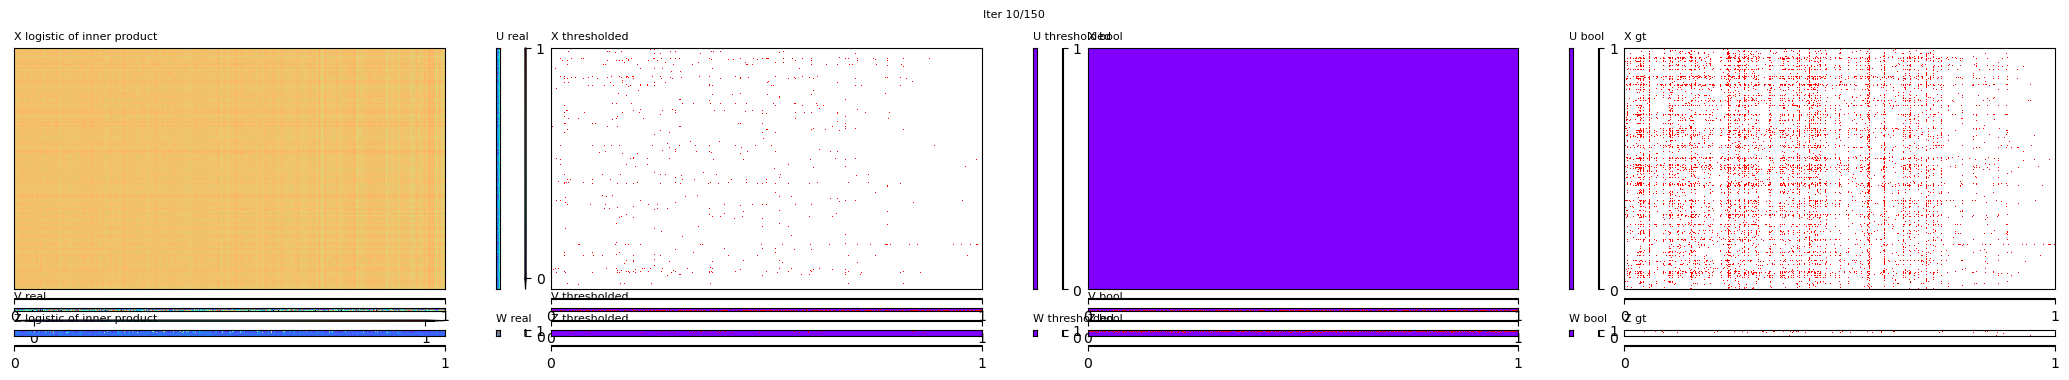

[INFO] Iter 11/150. Time: 0.5
[INFO] trn rmse: 0.91 tpr: 0.17 ppv: 1.00 acc: 0.95 f1: 0.29 loss: 33509.3 (change -4.54%)
[INFO] tst rmse: 0.91 tpr: 0.17 ppv: 1.00 acc: 0.95 f1: 0.29
[INFO] Iter 12/150. Time: 0.6
[INFO] trn rmse: 0.89 tpr: 0.21 ppv: 1.00 acc: 0.95 f1: 0.34 loss: 31927.9 (change -4.72%)
[INFO] tst rmse: 0.89 tpr: 0.21 ppv: 1.00 acc: 0.95 f1: 0.34
[INFO] Iter 13/150. Time: 0.6
[INFO] trn rmse: 0.87 tpr: 0.24 ppv: 1.00 acc: 0.95 f1: 0.39 loss: 30440.8 (change -4.66%)
[INFO] tst rmse: 0.87 tpr: 0.24 ppv: 1.00 acc: 0.95 f1: 0.39
[INFO] Iter 14/150. Time: 0.6
[INFO] trn rmse: 0.85 tpr: 0.28 ppv: 1.00 acc: 0.95 f1: 0.43 loss: 29076.8 (change -4.48%)
[INFO] tst rmse: 0.85 tpr: 0.28 ppv: 1.00 acc: 0.95 f1: 0.43
[INFO] Iter 15/150. Time: 0.6
[INFO] trn rmse: 0.83 tpr: 0.31 ppv: 1.00 acc: 0.96 f1: 0.47 loss: 27879.9 (change -4.12%)
[INFO] tst rmse: 0.83 tpr: 0.31 ppv: 1.00 acc: 0.96 f1: 0.47


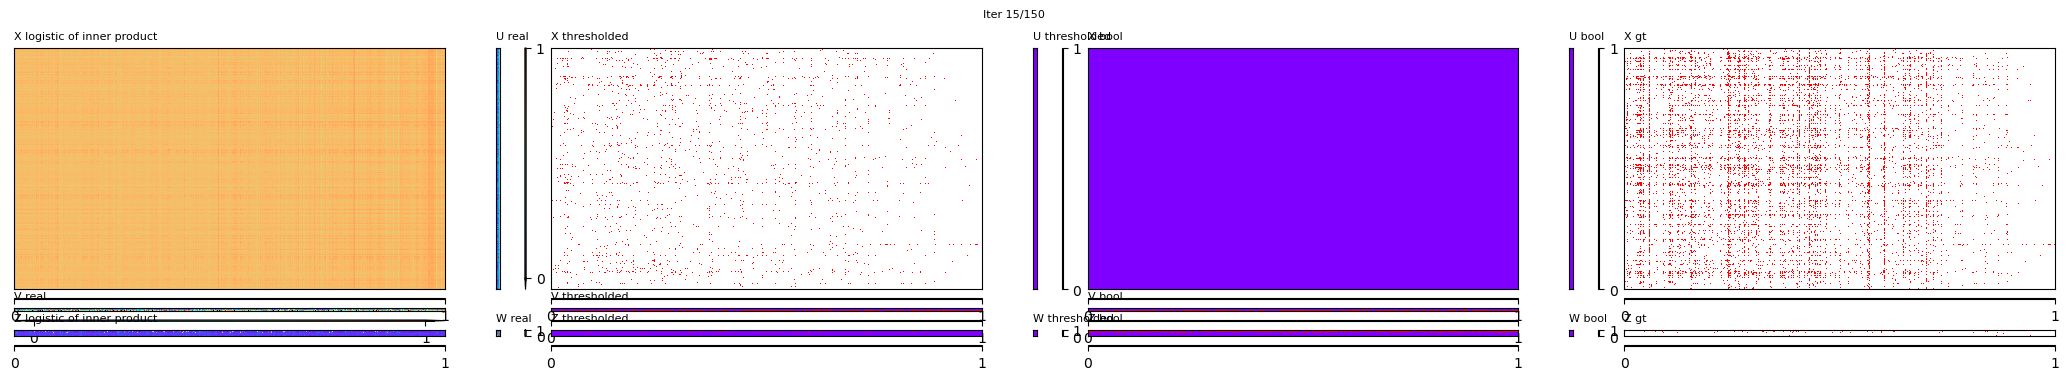

[INFO] Iter 16/150. Time: 0.5
[INFO] trn rmse: 0.82 tpr: 0.33 ppv: 1.00 acc: 0.96 f1: 0.50 loss: 26804.4 (change -3.86%)
[INFO] tst rmse: 0.82 tpr: 0.33 ppv: 1.00 acc: 0.96 f1: 0.50
[INFO] Iter 17/150. Time: 0.5
[INFO] trn rmse: 0.80 tpr: 0.36 ppv: 1.00 acc: 0.96 f1: 0.52 loss: 25834.5 (change -3.62%)
[INFO] tst rmse: 0.80 tpr: 0.36 ppv: 1.00 acc: 0.96 f1: 0.52
[INFO] Iter 18/150. Time: 0.7
[INFO] trn rmse: 0.79 tpr: 0.38 ppv: 1.00 acc: 0.96 f1: 0.55 loss: 25011.4 (change -3.19%)
[INFO] tst rmse: 0.79 tpr: 0.38 ppv: 1.00 acc: 0.96 f1: 0.55
[INFO] Iter 19/150. Time: 0.5
[INFO] trn rmse: 0.78 tpr: 0.39 ppv: 1.00 acc: 0.96 f1: 0.56 loss: 24334.5 (change -2.71%)
[INFO] tst rmse: 0.78 tpr: 0.39 ppv: 1.00 acc: 0.96 f1: 0.56
[INFO] Iter 20/150. Time: 0.5
[INFO] trn rmse: 0.77 tpr: 0.41 ppv: 1.00 acc: 0.96 f1: 0.58 loss: 23744.4 (change -2.42%)
[INFO] tst rmse: 0.77 tpr: 0.41 ppv: 1.00 acc: 0.96 f1: 0.58


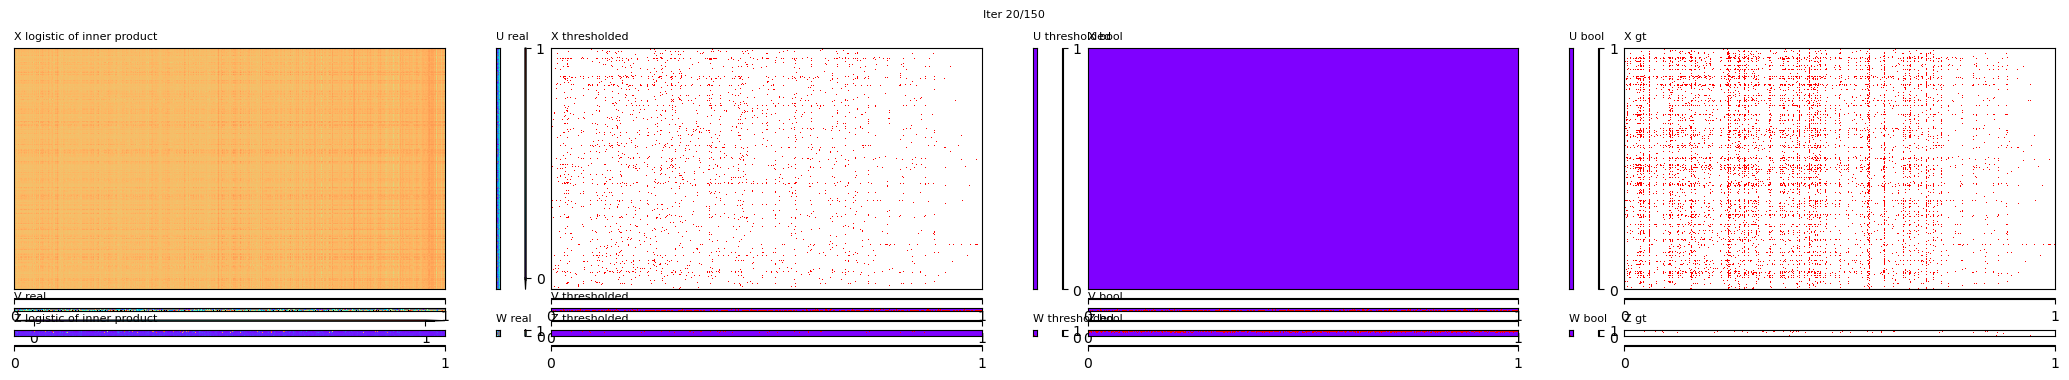

[INFO] Iter 21/150. Time: 0.7
[INFO] trn rmse: 0.76 tpr: 0.42 ppv: 1.00 acc: 0.96 f1: 0.59 loss: 23259.2 (change -2.04%)
[INFO] tst rmse: 0.76 tpr: 0.42 ppv: 1.00 acc: 0.96 f1: 0.59
[INFO] Iter 22/150. Time: 0.4
[INFO] trn rmse: 0.75 tpr: 0.43 ppv: 1.00 acc: 0.96 f1: 0.60 loss: 22820.4 (change -1.89%)
[INFO] tst rmse: 0.75 tpr: 0.43 ppv: 1.00 acc: 0.96 f1: 0.60
[INFO] Iter 23/150. Time: 0.4
[INFO] trn rmse: 0.75 tpr: 0.44 ppv: 1.00 acc: 0.96 f1: 0.61 loss: 22468.9 (change -1.54%)
[INFO] tst rmse: 0.75 tpr: 0.44 ppv: 1.00 acc: 0.96 f1: 0.61
[INFO] Iter 24/150. Time: 0.5
[INFO] trn rmse: 0.74 tpr: 0.45 ppv: 1.00 acc: 0.97 f1: 0.62 loss: 22197.9 (change -1.21%)
[INFO] tst rmse: 0.74 tpr: 0.45 ppv: 1.00 acc: 0.97 f1: 0.62
[INFO] Iter 25/150. Time: 0.4
[INFO] trn rmse: 0.74 tpr: 0.45 ppv: 1.00 acc: 0.97 f1: 0.62 loss: 21984.6 (change -0.96%)
[INFO] tst rmse: 0.74 tpr: 0.45 ppv: 1.00 acc: 0.97 f1: 0.62


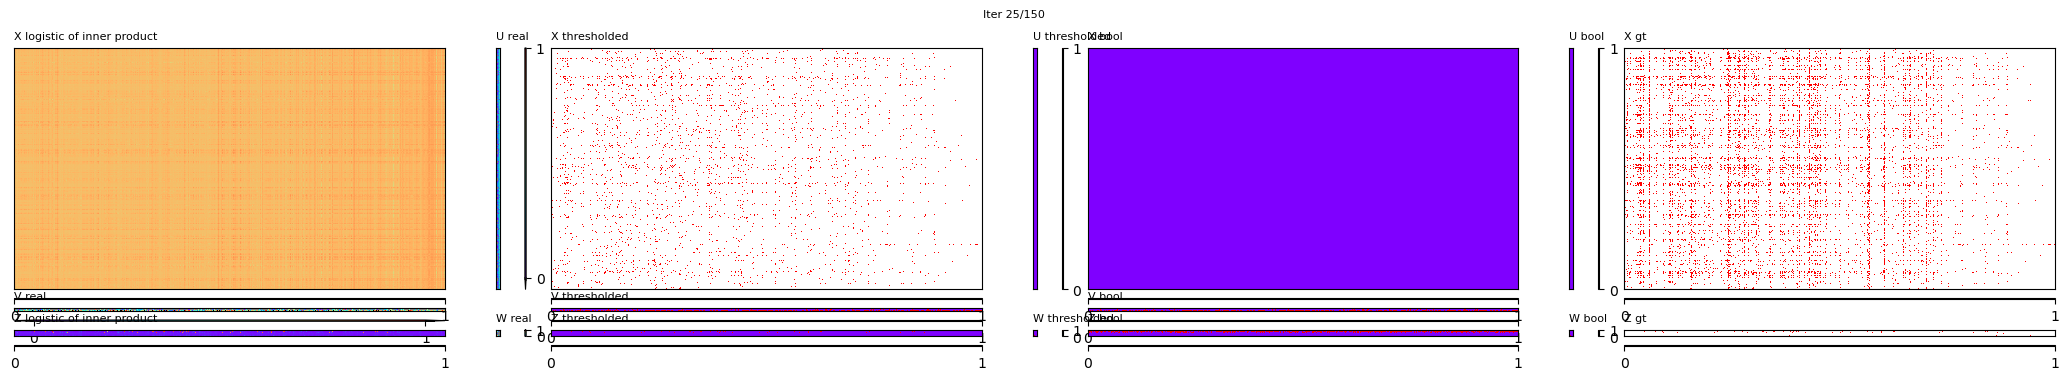

[INFO] Iter 26/150. Time: 0.5
[INFO] trn rmse: 0.74 tpr: 0.46 ppv: 1.00 acc: 0.97 f1: 0.63 loss: 21798.7 (change -0.85%)
[INFO] tst rmse: 0.74 tpr: 0.46 ppv: 1.00 acc: 0.97 f1: 0.63
[INFO] Iter 27/150. Time: 0.5
[INFO] trn rmse: 0.74 tpr: 0.46 ppv: 1.00 acc: 0.97 f1: 0.63 loss: 21663.5 (change -0.62%)
[INFO] tst rmse: 0.74 tpr: 0.46 ppv: 1.00 acc: 0.97 f1: 0.63
[INFO] Iter 28/150. Time: 0.5
[INFO] trn rmse: 0.73 tpr: 0.46 ppv: 1.00 acc: 0.97 f1: 0.63 loss: 21564.0 (change -0.46%)
[INFO] tst rmse: 0.73 tpr: 0.46 ppv: 1.00 acc: 0.97 f1: 0.63
[INFO] Iter 29/150. Time: 0.5
[INFO] trn rmse: 0.73 tpr: 0.46 ppv: 1.00 acc: 0.97 f1: 0.63 loss: 21507.2 (change -0.26%)
[INFO] tst rmse: 0.73 tpr: 0.46 ppv: 1.00 acc: 0.97 f1: 0.63
[INFO] Iter 30/150. Time: 0.5
[INFO] trn rmse: 0.73 tpr: 0.46 ppv: 1.00 acc: 0.97 f1: 0.63 loss: 21449.6 (change -0.27%)
[INFO] tst rmse: 0.73 tpr: 0.46 ppv: 1.00 acc: 0.97 f1: 0.63


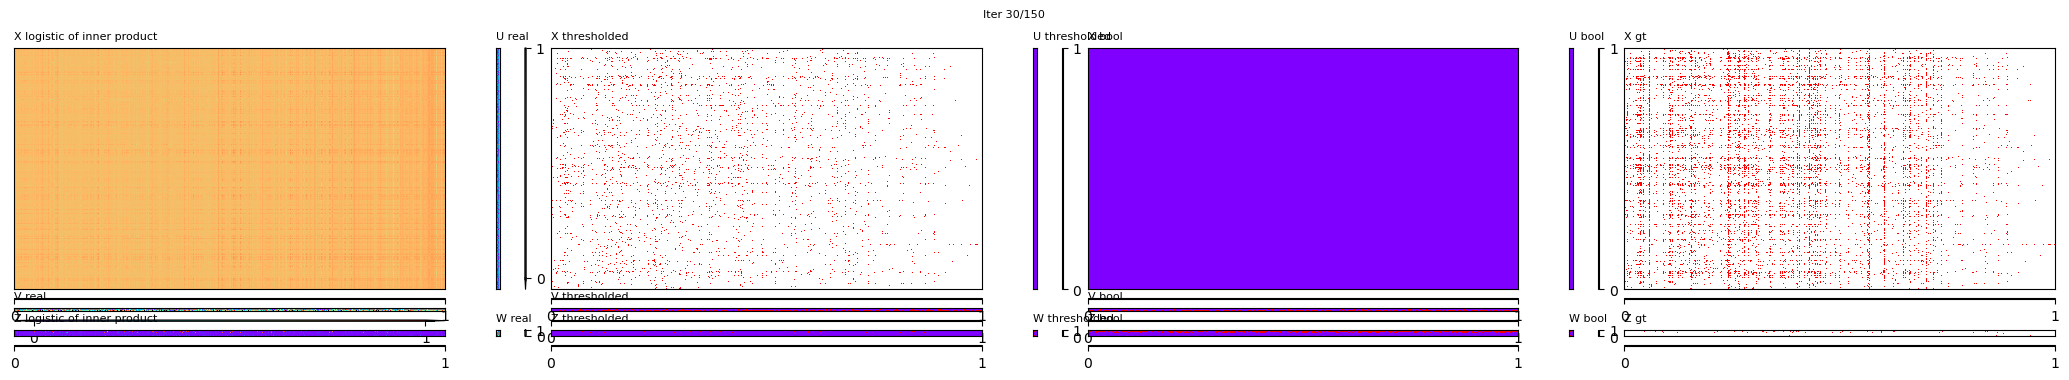

[INFO] Iter 31/150. Time: 0.7
[INFO] trn rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64 loss: 21386.6 (change -0.29%)
[INFO] tst rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64
[INFO] Iter 32/150. Time: 0.6
[INFO] trn rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64 loss: 21354.8 (change -0.15%)
[INFO] tst rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64
[INFO] Iter 33/150. Time: 0.6
[INFO] trn rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64 loss: 21317.1 (change -0.18%)
[INFO] tst rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64
[INFO] Iter 34/150. Time: 0.7
[INFO] trn rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64 loss: 21313.4 (change -0.02%)
[INFO] tst rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64
[INFO] Iter 35/150. Time: 0.5
[INFO] trn rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64 loss: 21296.7 (change -0.08%)
[INFO] tst rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64


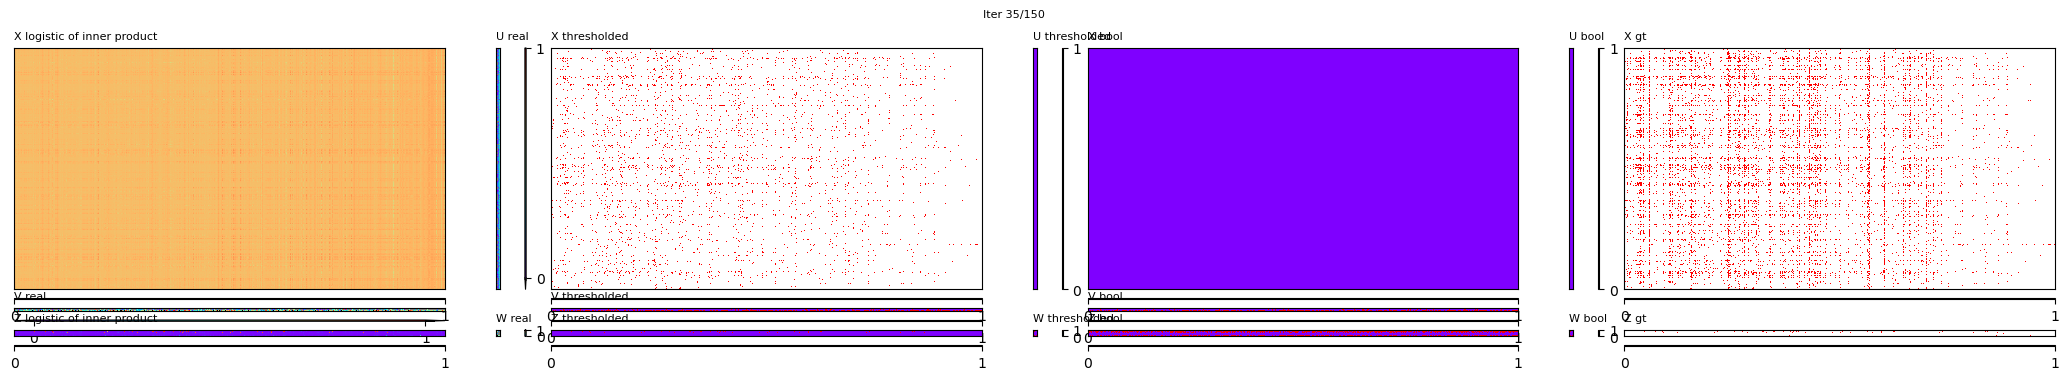

[INFO] Iter 36/150. Time: 0.9
[INFO] trn rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64 loss: 21276.4 (change -0.10%)
[INFO] tst rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64
[INFO] Iter 37/150. Time: 0.6
[INFO] trn rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64 loss: 21248.6 (change -0.13%)
[INFO] tst rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64
[INFO] Iter 38/150. Time: 0.5
[INFO] trn rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64 loss: 21211.6 (change -0.17%)
[INFO] tst rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64
[INFO] Iter 39/150. Time: 0.7
[INFO] trn rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64 loss: 21159.6 (change -0.25%)
[INFO] tst rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64
[INFO] Iter 40/150. Time: 0.5
[INFO] trn rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64 loss: 21126.8 (change -0.16%)
[INFO] tst rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64


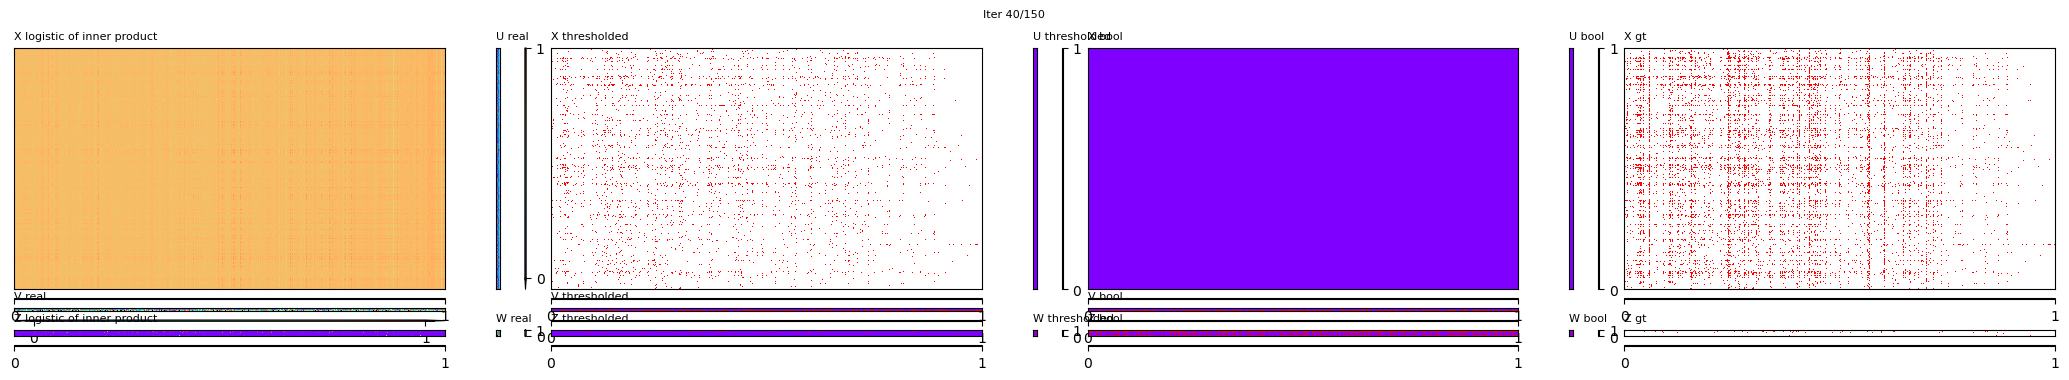

[INFO] Iter 41/150. Time: 0.6
[INFO] trn rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64 loss: 21099.6 (change -0.13%)
[INFO] tst rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64
[INFO] Iter 42/150. Time: 0.6
[INFO] trn rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64 loss: 21084.1 (change -0.07%)
[INFO] tst rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64
[INFO] Iter 43/150. Time: 0.6
[INFO] trn rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64 loss: 21057.8 (change -0.12%)
[INFO] tst rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64
[INFO] Iter 44/150. Time: 0.5
[INFO] trn rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64 loss: 21042.7 (change -0.07%)
[INFO] tst rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64
[INFO] Iter 45/150. Time: 0.4
[INFO] trn rmse: 0.72 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64 loss: 21011.3 (change -0.15%)
[INFO] tst rmse: 0.72 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64


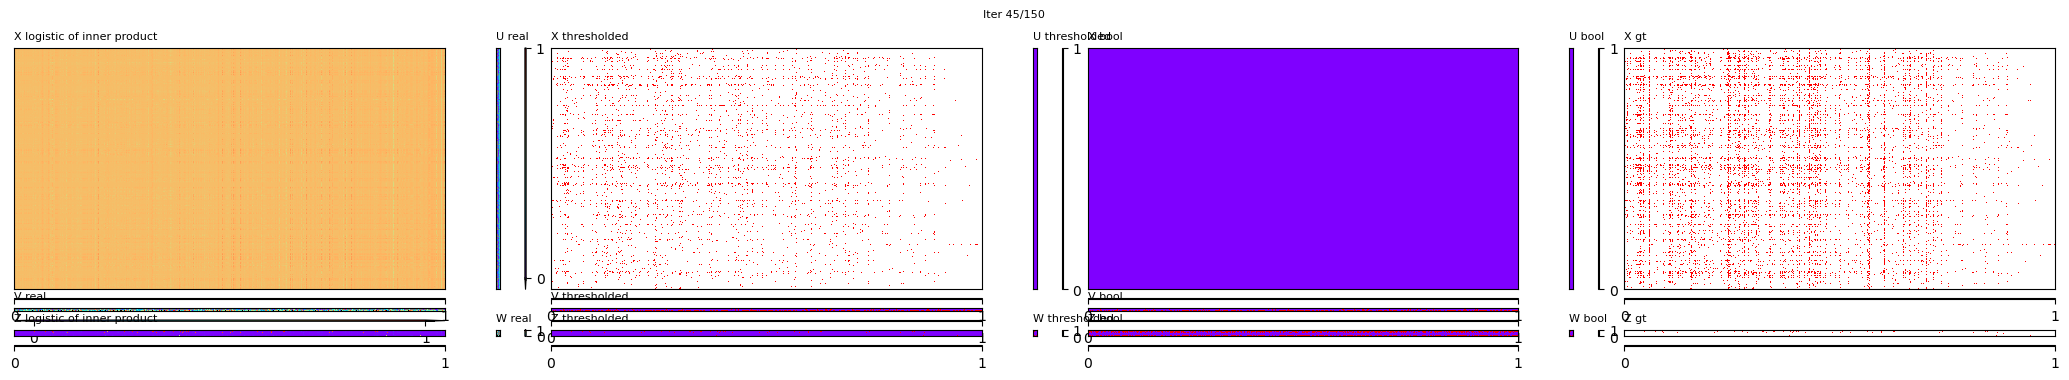

[INFO] Iter 46/150. Time: 0.5
[INFO] trn rmse: 0.72 tpr: 0.48 ppv: 1.00 acc: 0.97 f1: 0.65 loss: 20963.9 (change -0.23%)
[INFO] tst rmse: 0.72 tpr: 0.48 ppv: 1.00 acc: 0.97 f1: 0.65
[INFO] Iter 47/150. Time: 0.6
[INFO] trn rmse: 0.72 tpr: 0.48 ppv: 1.00 acc: 0.97 f1: 0.65 loss: 20949.7 (change -0.07%)
[INFO] tst rmse: 0.72 tpr: 0.48 ppv: 1.00 acc: 0.97 f1: 0.65
[INFO] Iter 48/150. Time: 0.6
[INFO] trn rmse: 0.72 tpr: 0.48 ppv: 1.00 acc: 0.97 f1: 0.65 loss: 20905.2 (change -0.21%)
[INFO] tst rmse: 0.72 tpr: 0.48 ppv: 1.00 acc: 0.97 f1: 0.65
[INFO] Iter 49/150. Time: 0.6
[INFO] trn rmse: 0.72 tpr: 0.48 ppv: 1.00 acc: 0.97 f1: 0.65 loss: 20838.2 (change -0.32%)
[INFO] tst rmse: 0.72 tpr: 0.48 ppv: 1.00 acc: 0.97 f1: 0.65
[INFO] Iter 50/150. Time: 0.7
[INFO] trn rmse: 0.72 tpr: 0.48 ppv: 1.00 acc: 0.97 f1: 0.65 loss: 20764.5 (change -0.35%)
[INFO] tst rmse: 0.72 tpr: 0.48 ppv: 1.00 acc: 0.97 f1: 0.65


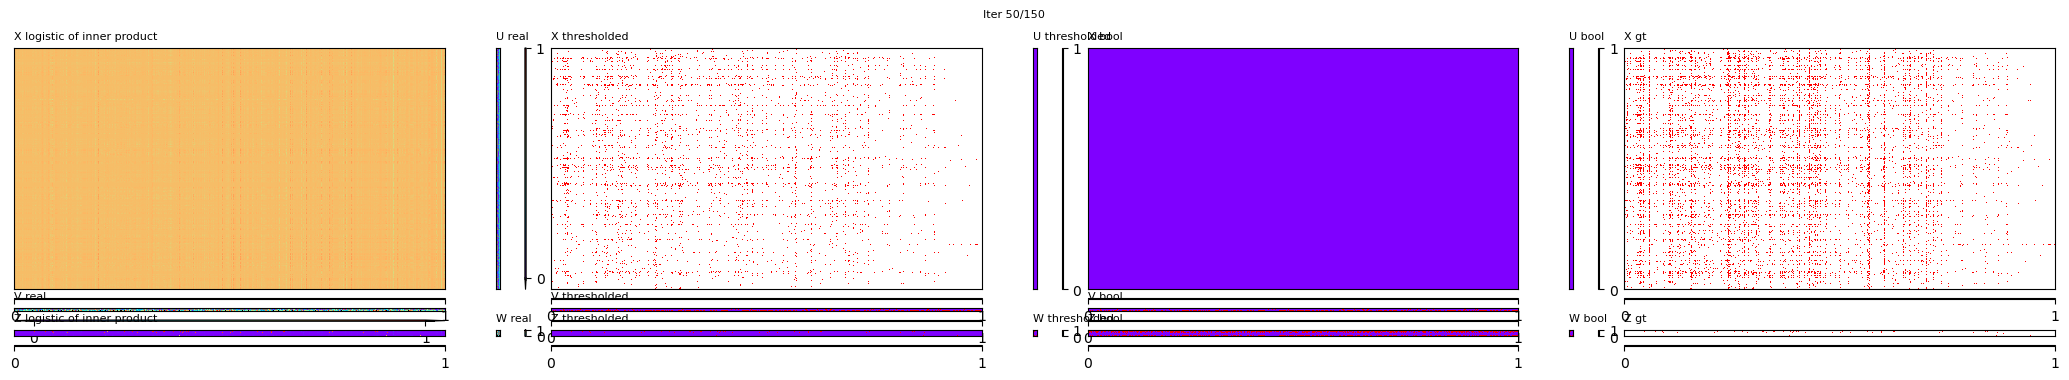

[INFO] Iter 51/150. Time: 0.7
[INFO] trn rmse: 0.72 tpr: 0.48 ppv: 1.00 acc: 0.97 f1: 0.65 loss: 20730.8 (change -0.16%)
[INFO] tst rmse: 0.72 tpr: 0.48 ppv: 1.00 acc: 0.97 f1: 0.65
[INFO] Iter 52/150. Time: 0.5
[INFO] trn rmse: 0.72 tpr: 0.48 ppv: 1.00 acc: 0.97 f1: 0.65 loss: 20639.9 (change -0.44%)
[INFO] tst rmse: 0.72 tpr: 0.48 ppv: 1.00 acc: 0.97 f1: 0.65
[INFO] Iter 53/150. Time: 0.6
[INFO] trn rmse: 0.72 tpr: 0.49 ppv: 1.00 acc: 0.97 f1: 0.65 loss: 20549.4 (change -0.44%)
[INFO] tst rmse: 0.72 tpr: 0.49 ppv: 1.00 acc: 0.97 f1: 0.65
[INFO] Iter 54/150. Time: 0.6
[INFO] trn rmse: 0.71 tpr: 0.49 ppv: 1.00 acc: 0.97 f1: 0.66 loss: 20449.3 (change -0.49%)
[INFO] tst rmse: 0.71 tpr: 0.49 ppv: 1.00 acc: 0.97 f1: 0.66
[INFO] Iter 55/150. Time: 0.6
[INFO] trn rmse: 0.71 tpr: 0.49 ppv: 1.00 acc: 0.97 f1: 0.66 loss: 20374.0 (change -0.37%)
[INFO] tst rmse: 0.71 tpr: 0.49 ppv: 1.00 acc: 0.97 f1: 0.66


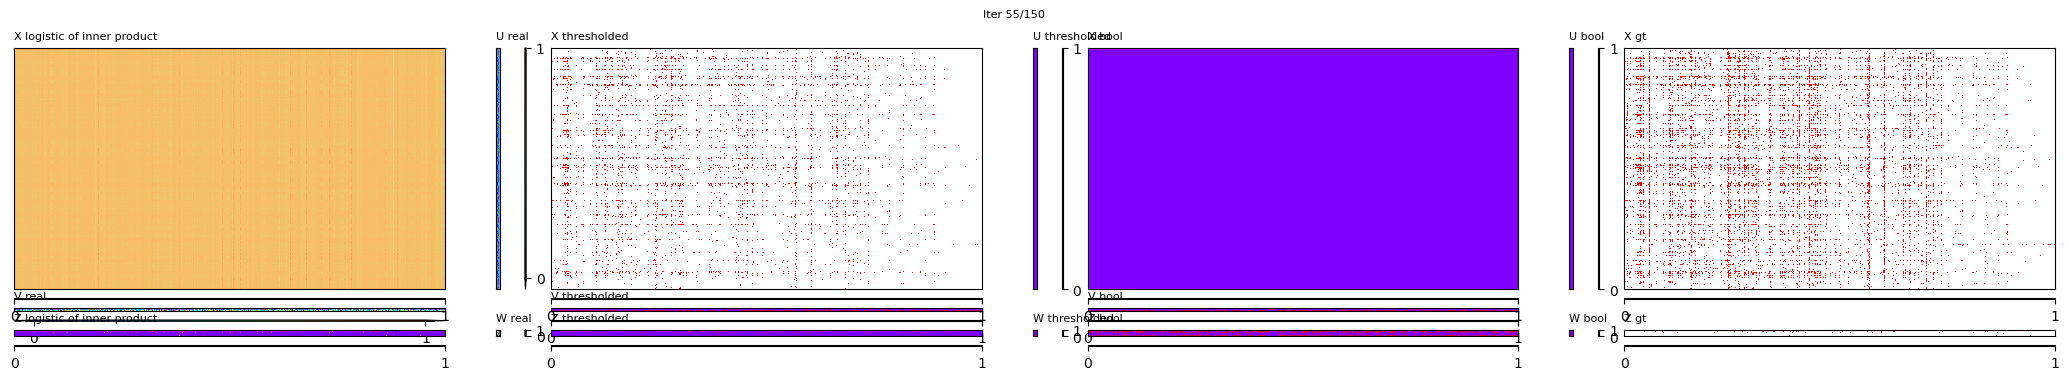

[INFO] Iter 56/150. Time: 0.6
[INFO] trn rmse: 0.71 tpr: 0.49 ppv: 1.00 acc: 0.97 f1: 0.66 loss: 20257.5 (change -0.57%)
[INFO] tst rmse: 0.71 tpr: 0.49 ppv: 1.00 acc: 0.97 f1: 0.66
[INFO] Iter 57/150. Time: 0.4
[INFO] trn rmse: 0.71 tpr: 0.50 ppv: 1.00 acc: 0.97 f1: 0.66 loss: 20150.6 (change -0.53%)
[INFO] tst rmse: 0.71 tpr: 0.50 ppv: 1.00 acc: 0.97 f1: 0.66
[INFO] Iter 58/150. Time: 0.4
[INFO] trn rmse: 0.71 tpr: 0.50 ppv: 1.00 acc: 0.97 f1: 0.67 loss: 20056.6 (change -0.47%)
[INFO] tst rmse: 0.71 tpr: 0.50 ppv: 1.00 acc: 0.97 f1: 0.67
[INFO] Iter 59/150. Time: 0.5
[INFO] trn rmse: 0.71 tpr: 0.50 ppv: 1.00 acc: 0.97 f1: 0.67 loss: 19948.5 (change -0.54%)
[INFO] tst rmse: 0.71 tpr: 0.50 ppv: 1.00 acc: 0.97 f1: 0.67
[INFO] Iter 60/150. Time: 0.6
[INFO] trn rmse: 0.70 tpr: 0.50 ppv: 1.00 acc: 0.97 f1: 0.67 loss: 19840.8 (change -0.54%)
[INFO] tst rmse: 0.70 tpr: 0.50 ppv: 1.00 acc: 0.97 f1: 0.67


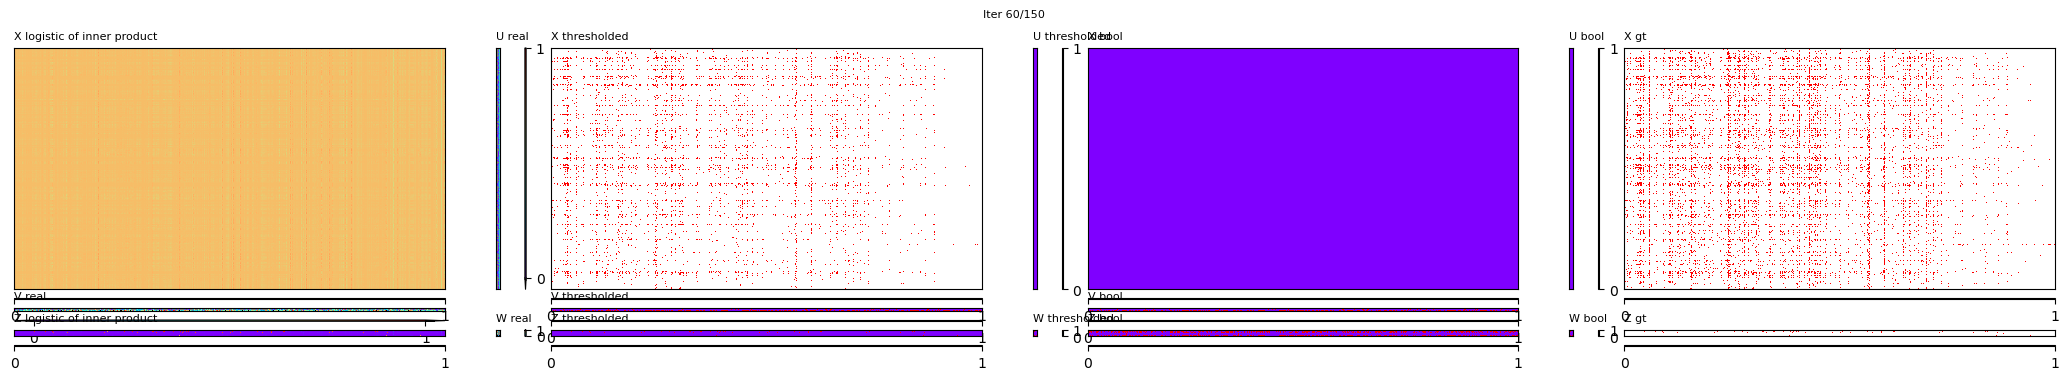

[INFO] Iter 61/150. Time: 0.6
[INFO] trn rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.67 loss: 19728.0 (change -0.57%)
[INFO] tst rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.67
[INFO] Iter 62/150. Time: 0.6
[INFO] trn rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.67 loss: 19654.3 (change -0.37%)
[INFO] tst rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.67
[INFO] Iter 63/150. Time: 0.4
[INFO] trn rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19582.7 (change -0.36%)
[INFO] tst rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.68
[INFO] Iter 64/150. Time: 0.4
[INFO] trn rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19506.2 (change -0.39%)
[INFO] tst rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.68
[INFO] Iter 65/150. Time: 0.4
[INFO] trn rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19465.0 (change -0.21%)
[INFO] tst rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.68


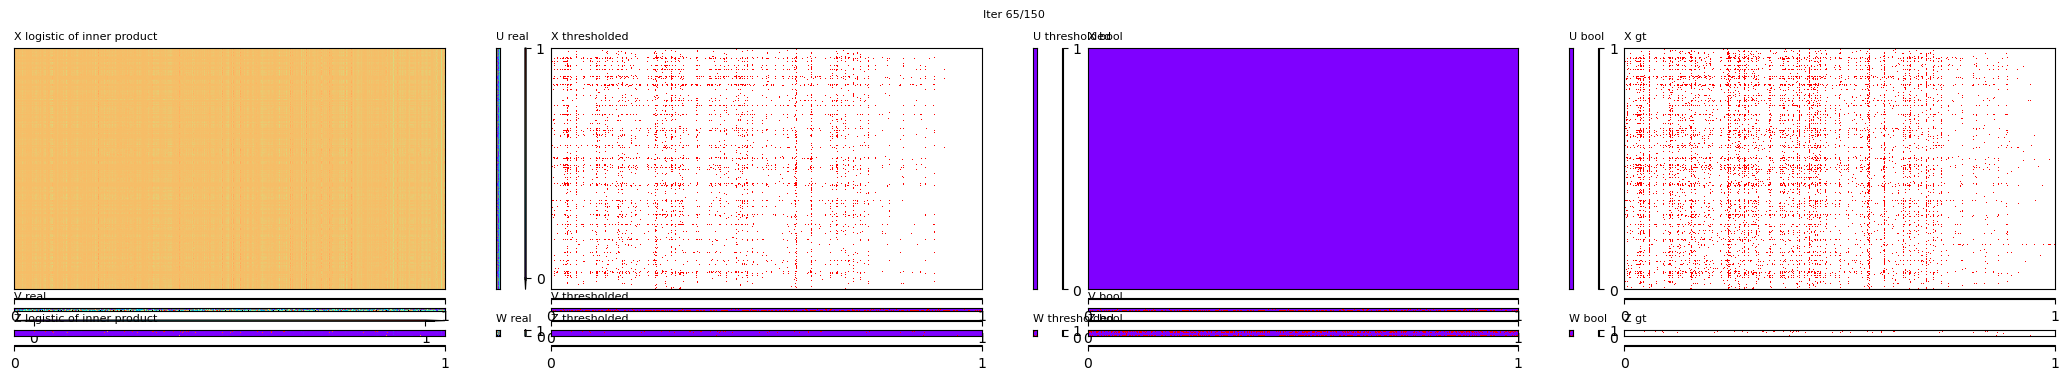

[INFO] Iter 66/150. Time: 0.6
[INFO] trn rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19408.9 (change -0.29%)
[INFO] tst rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.68
[INFO] Iter 67/150. Time: 0.6
[INFO] trn rmse: 0.70 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19366.9 (change -0.22%)
[INFO] tst rmse: 0.70 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68
[INFO] Iter 68/150. Time: 0.6
[INFO] trn rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19321.3 (change -0.24%)
[INFO] tst rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68
[INFO] Iter 69/150. Time: 0.4
[INFO] trn rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19288.0 (change -0.17%)
[INFO] tst rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68
[INFO] Iter 70/150. Time: 0.5
[INFO] trn rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19275.6 (change -0.06%)
[INFO] tst rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68


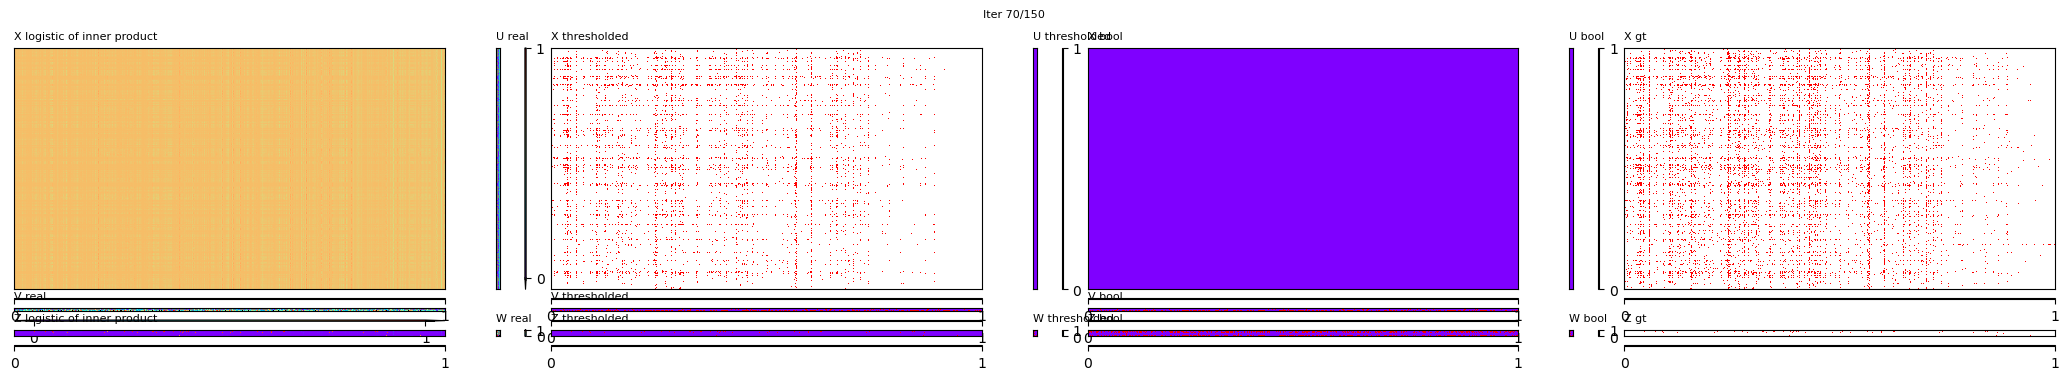

[INFO] Iter 71/150. Time: 0.6
[INFO] trn rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19246.3 (change -0.15%)
[INFO] tst rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68
[INFO] Iter 72/150. Time: 0.5
[INFO] trn rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19230.7 (change -0.08%)
[INFO] tst rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68
[INFO] Iter 73/150. Time: 0.5
[INFO] trn rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19212.3 (change -0.10%)
[INFO] tst rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68
[INFO] Iter 74/150. Time: 0.5
[INFO] trn rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19191.0 (change -0.11%)
[INFO] tst rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68
[INFO] Iter 75/150. Time: 0.5
[INFO] trn rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19177.8 (change -0.07%)
[INFO] tst rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68


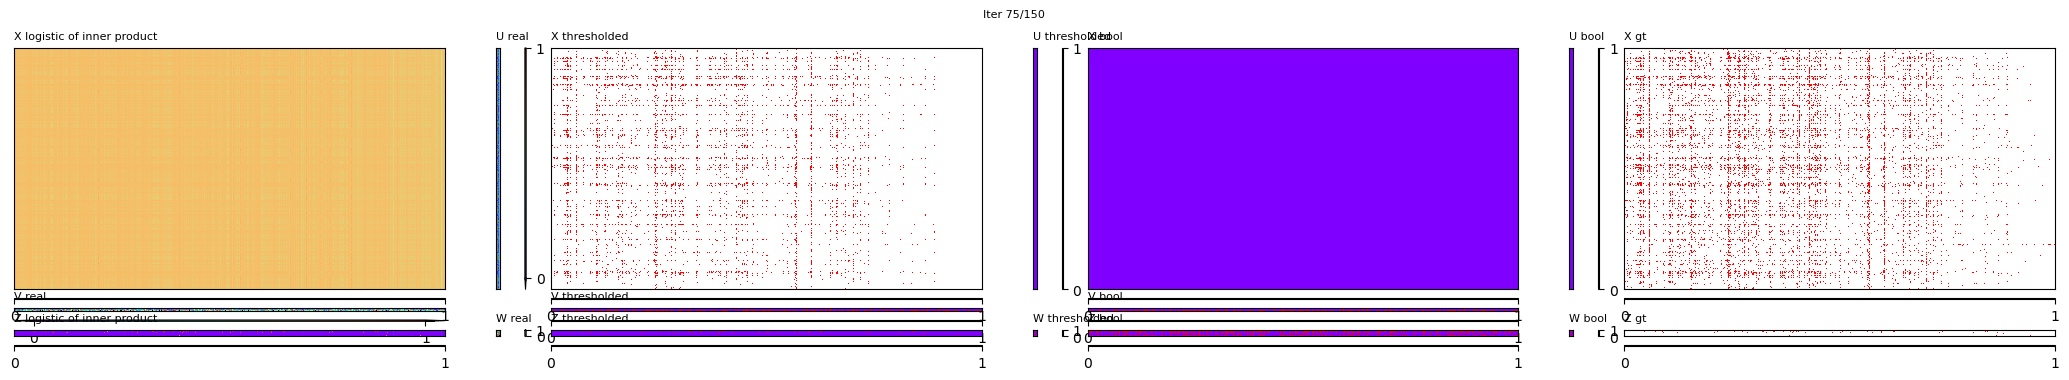

[INFO] Iter 76/150. Time: 0.5
[INFO] trn rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19180.6 (change 0.01%)
[INFO] tst rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68
[INFO] Iter 77/150. Time: 0.6
[INFO] trn rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19186.2 (change 0.03%)
[INFO] tst rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68
[INFO] Iter 78/150. Time: 0.5
[INFO] trn rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19191.3 (change 0.03%)
[INFO] tst rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68
[INFO] Iter 79/150. Time: 0.5
[INFO] trn rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19179.3 (change -0.06%)
[INFO] tst rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68
[INFO] Iter 80/150. Time: 0.5
[INFO] trn rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19184.5 (change 0.03%)
[INFO] tst rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68


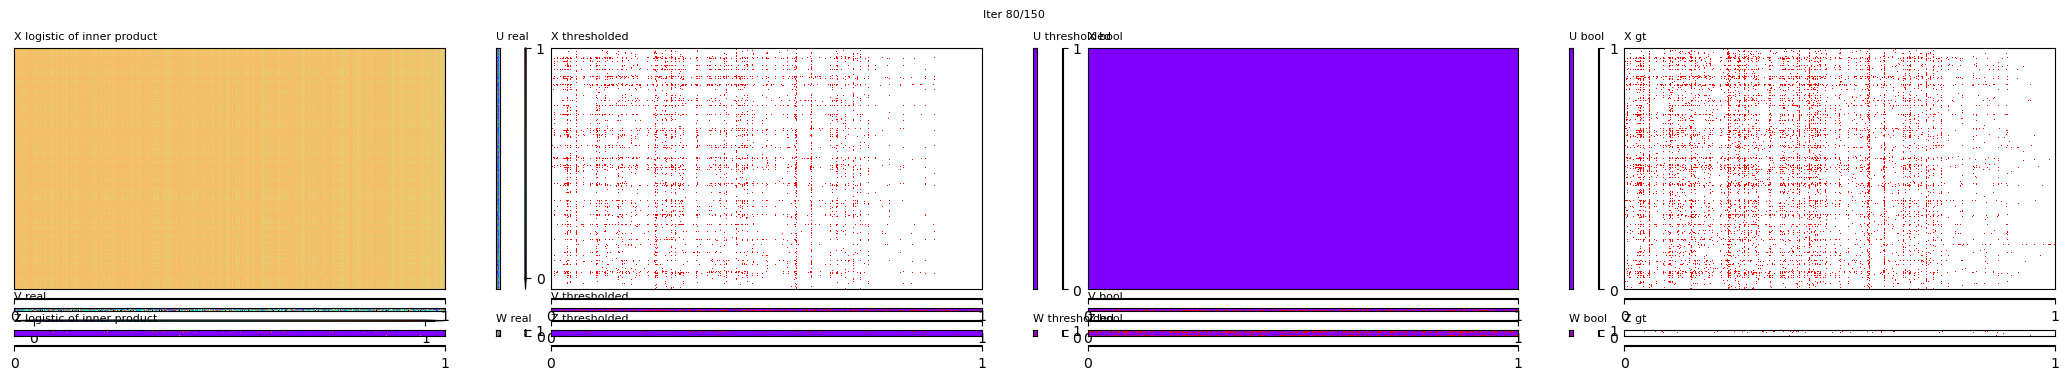

[INFO] Iter 81/150. Time: 0.5
[INFO] trn rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19178.9 (change -0.03%)
[INFO] tst rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68
[INFO] Iter 82/150. Time: 0.4
[INFO] trn rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19180.8 (change 0.01%)
[INFO] tst rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68
[INFO] Iter 83/150. Time: 0.6
[INFO] trn rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19195.6 (change 0.08%)
[INFO] tst rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68
[INFO] Iter 84/150. Time: 0.5
[INFO] trn rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19218.8 (change 0.12%)
[INFO] tst rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68
[INFO] Iter 85/150. Time: 0.6
[INFO] trn rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19236.4 (change 0.09%)
[INFO] tst rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68


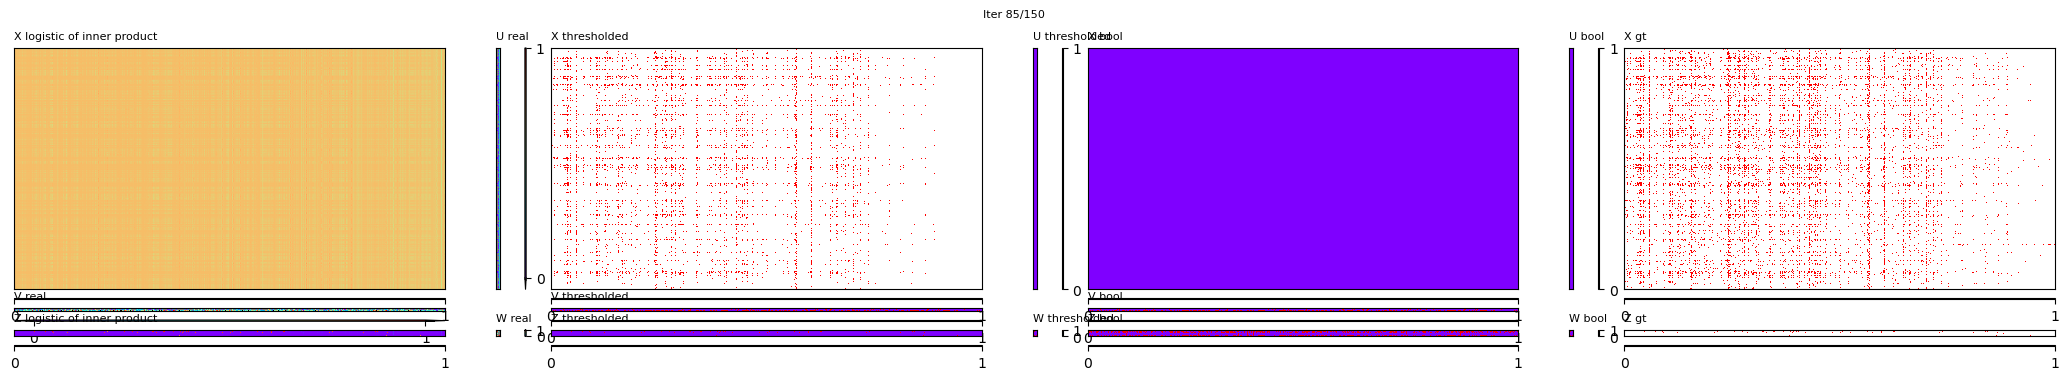

[INFO] Iter 86/150. Time: 0.4
[INFO] trn rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19253.6 (change 0.09%)
[INFO] tst rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68
[INFO] Iter 87/150. Time: 0.4
[INFO] trn rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19273.5 (change 0.10%)
[INFO] tst rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68
[INFO] Iter 88/150. Time: 0.5
[INFO] trn rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19274.3 (change 0.00%)
[INFO] tst rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68
[INFO] Iter 89/150. Time: 0.5
[INFO] trn rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19306.7 (change 0.17%)
[INFO] tst rmse: 0.69 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68
[INFO] Iter 90/150. Time: 0.7
[INFO] trn rmse: 0.70 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19339.1 (change 0.17%)
[INFO] tst rmse: 0.70 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68


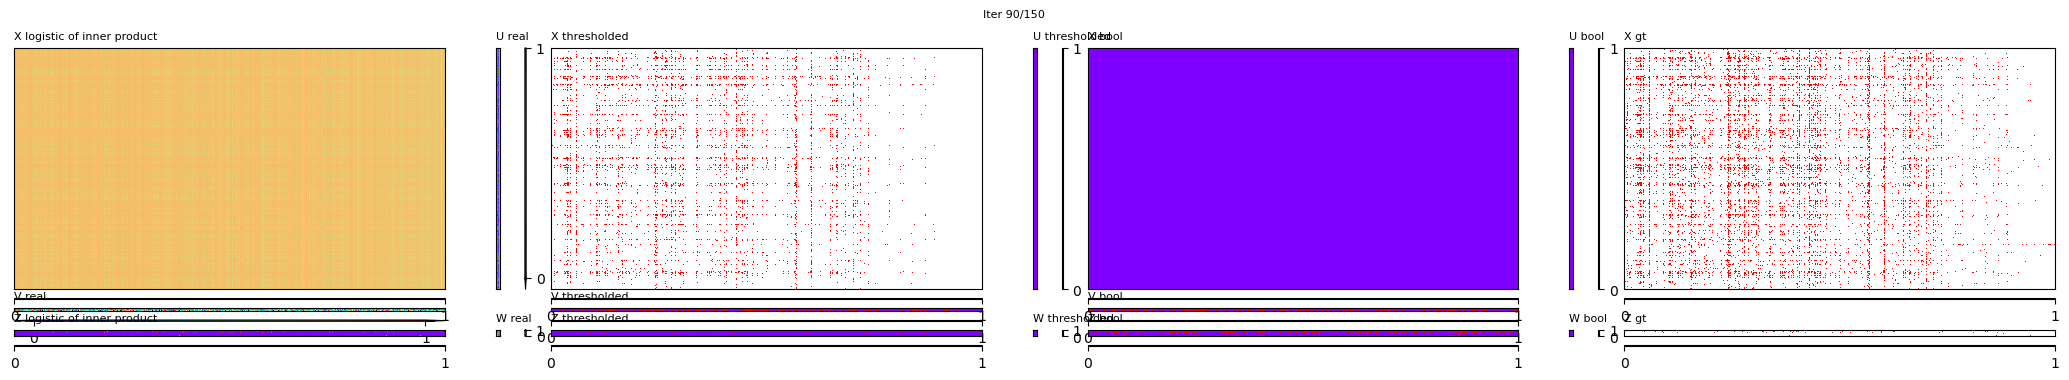

[INFO] Iter 91/150. Time: 0.5
[INFO] trn rmse: 0.70 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19361.9 (change 0.12%)
[INFO] tst rmse: 0.70 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68
[INFO] Iter 92/150. Time: 0.4
[INFO] trn rmse: 0.70 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19390.3 (change 0.15%)
[INFO] tst rmse: 0.70 tpr: 0.52 ppv: 1.00 acc: 0.97 f1: 0.68
[INFO] Iter 93/150. Time: 0.5
[INFO] trn rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19421.1 (change 0.16%)
[INFO] tst rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.68
[INFO] Iter 94/150. Time: 0.5
[INFO] trn rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19462.6 (change 0.21%)
[INFO] tst rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.68
[INFO] Iter 95/150. Time: 0.5
[INFO] trn rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19485.0 (change 0.12%)
[INFO] tst rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.68


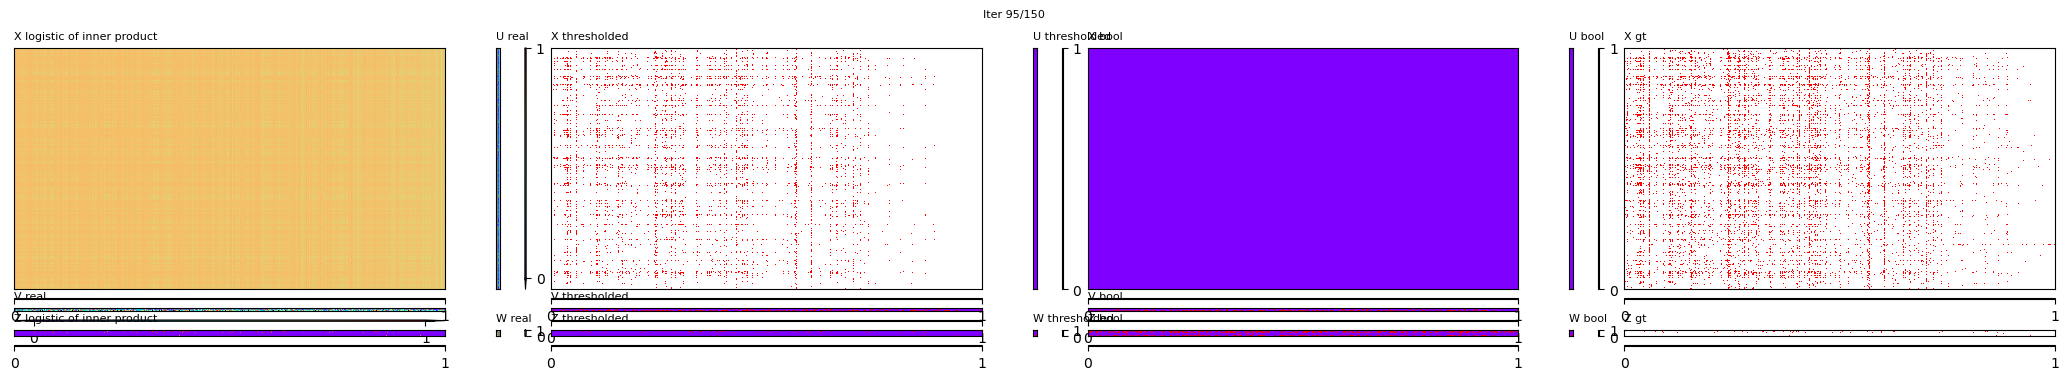

[INFO] Iter 96/150. Time: 0.7
[INFO] trn rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19511.4 (change 0.14%)
[INFO] tst rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.68
[INFO] Iter 97/150. Time: 0.7
[INFO] trn rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19542.6 (change 0.16%)
[INFO] tst rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.68
[INFO] Iter 98/150. Time: 0.5
[INFO] trn rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19559.8 (change 0.09%)
[INFO] tst rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.68
[INFO] Iter 99/150. Time: 0.5
[INFO] trn rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19588.2 (change 0.15%)
[INFO] tst rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.68
[INFO] Iter 100/150. Time: 0.5
[INFO] trn rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.68 loss: 19615.4 (change 0.14%)
[INFO] tst rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.68


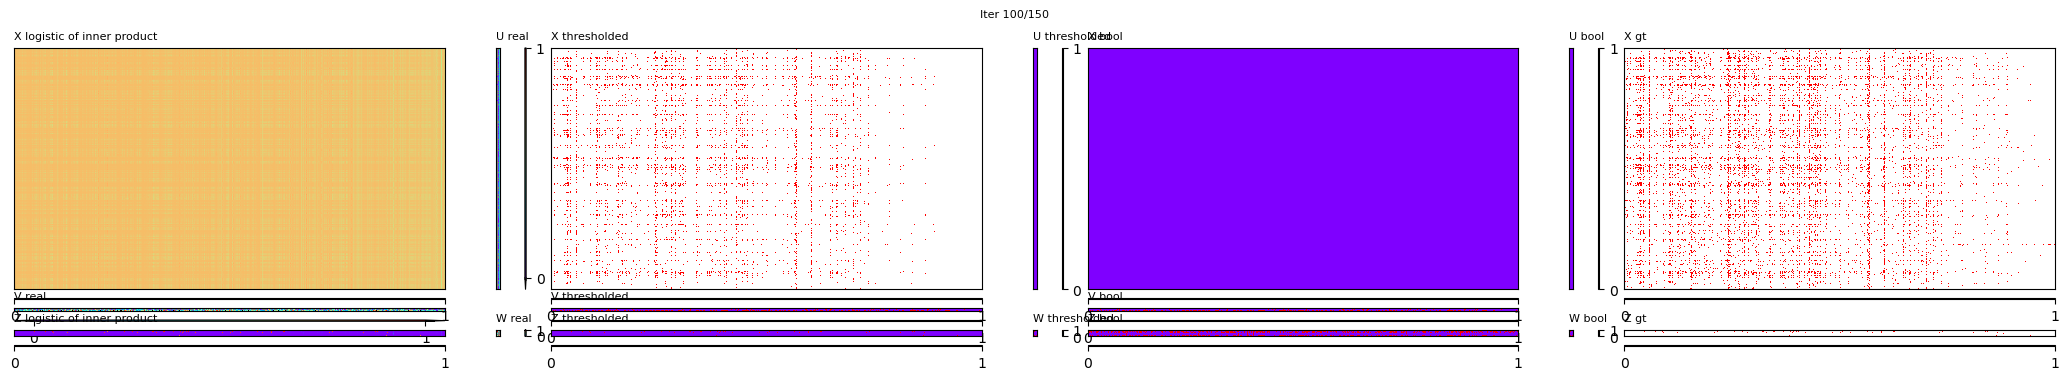

[INFO] Iter 101/150. Time: 0.7
[INFO] trn rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.67 loss: 19640.6 (change 0.13%)
[INFO] tst rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.67
[INFO] Iter 102/150. Time: 0.6
[INFO] trn rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.67 loss: 19686.5 (change 0.23%)
[INFO] tst rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.67
[INFO] Iter 103/150. Time: 0.5
[INFO] trn rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.67 loss: 19709.7 (change 0.12%)
[INFO] tst rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.67
[INFO] Iter 104/150. Time: 0.6
[INFO] trn rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.67 loss: 19751.7 (change 0.21%)
[INFO] tst rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.67
[INFO] Iter 105/150. Time: 0.5
[INFO] trn rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.67 loss: 19790.5 (change 0.20%)
[INFO] tst rmse: 0.70 tpr: 0.51 ppv: 1.00 acc: 0.97 f1: 0.67


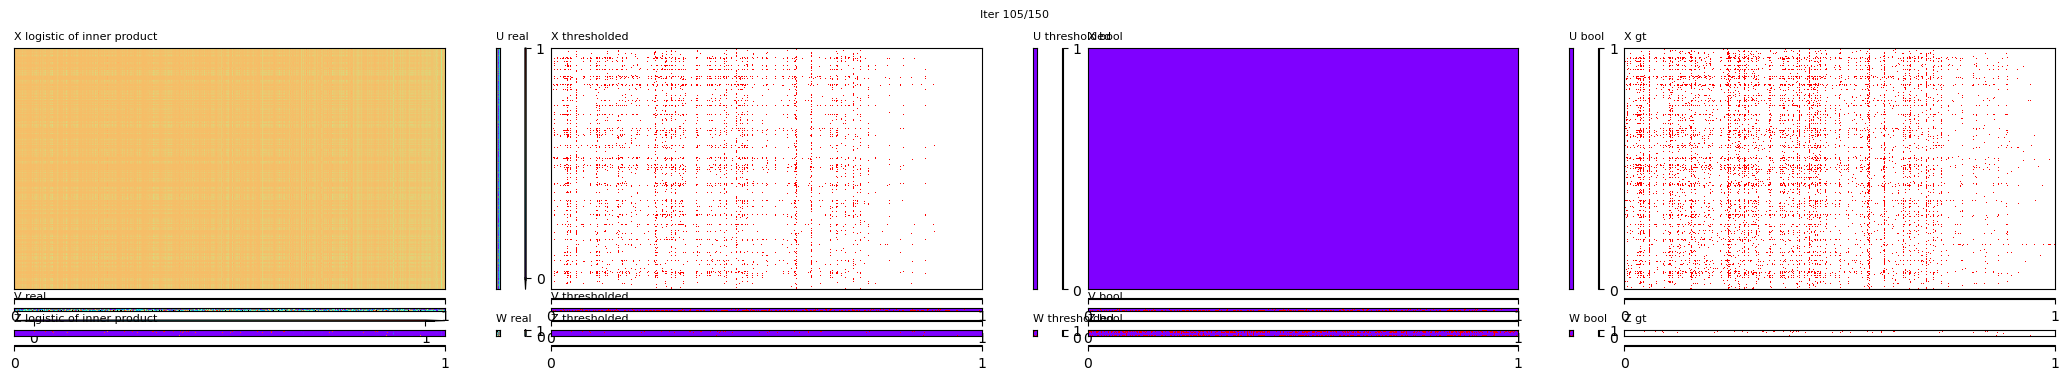

[INFO] Iter 106/150. Time: 0.7
[INFO] trn rmse: 0.70 tpr: 0.50 ppv: 1.00 acc: 0.97 f1: 0.67 loss: 19834.1 (change 0.22%)
[INFO] tst rmse: 0.70 tpr: 0.50 ppv: 1.00 acc: 0.97 f1: 0.67
[INFO] Iter 107/150. Time: 0.6
[INFO] trn rmse: 0.70 tpr: 0.50 ppv: 1.00 acc: 0.97 f1: 0.67 loss: 19853.3 (change 0.10%)
[INFO] tst rmse: 0.70 tpr: 0.50 ppv: 1.00 acc: 0.97 f1: 0.67
[INFO] Iter 108/150. Time: 0.6
[INFO] trn rmse: 0.70 tpr: 0.50 ppv: 1.00 acc: 0.97 f1: 0.67 loss: 19881.7 (change 0.14%)
[INFO] tst rmse: 0.70 tpr: 0.50 ppv: 1.00 acc: 0.97 f1: 0.67
[INFO] Iter 109/150. Time: 0.5
[INFO] trn rmse: 0.71 tpr: 0.50 ppv: 1.00 acc: 0.97 f1: 0.67 loss: 19914.9 (change 0.17%)
[INFO] tst rmse: 0.71 tpr: 0.50 ppv: 1.00 acc: 0.97 f1: 0.67
[INFO] Iter 110/150. Time: 0.5
[INFO] trn rmse: 0.71 tpr: 0.50 ppv: 1.00 acc: 0.97 f1: 0.67 loss: 19936.5 (change 0.11%)
[INFO] tst rmse: 0.71 tpr: 0.50 ppv: 1.00 acc: 0.97 f1: 0.67


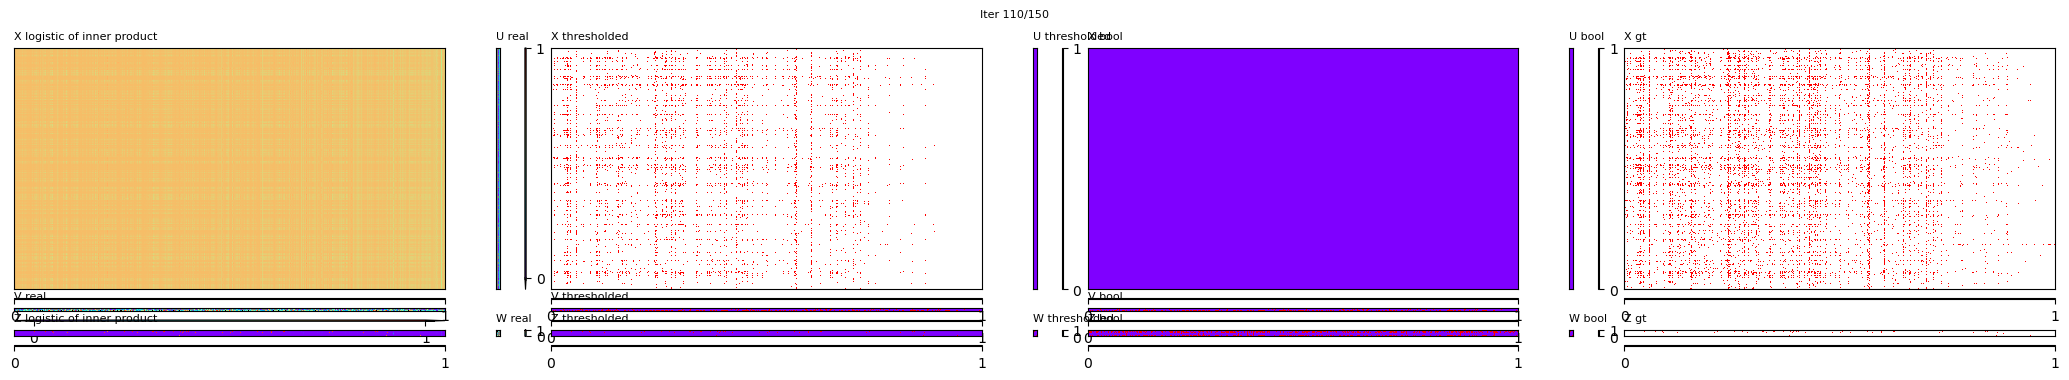

[INFO] Iter 111/150. Time: 2.2
[INFO] trn rmse: 0.71 tpr: 0.50 ppv: 1.00 acc: 0.97 f1: 0.67 loss: 19965.7 (change 0.15%)
[INFO] tst rmse: 0.71 tpr: 0.50 ppv: 1.00 acc: 0.97 f1: 0.67
[INFO] Iter 112/150. Time: 0.5
[INFO] trn rmse: 0.71 tpr: 0.50 ppv: 1.00 acc: 0.97 f1: 0.67 loss: 20015.2 (change 0.25%)
[INFO] tst rmse: 0.71 tpr: 0.50 ppv: 1.00 acc: 0.97 f1: 0.67
[INFO] Iter 113/150. Time: 0.5
[INFO] trn rmse: 0.71 tpr: 0.50 ppv: 1.00 acc: 0.97 f1: 0.67 loss: 20047.2 (change 0.16%)
[INFO] tst rmse: 0.71 tpr: 0.50 ppv: 1.00 acc: 0.97 f1: 0.67
[INFO] Iter 114/150. Time: 0.5
[INFO] trn rmse: 0.71 tpr: 0.50 ppv: 1.00 acc: 0.97 f1: 0.66 loss: 20085.6 (change 0.19%)
[INFO] tst rmse: 0.71 tpr: 0.50 ppv: 1.00 acc: 0.97 f1: 0.66
[INFO] Iter 115/150. Time: 0.6
[INFO] trn rmse: 0.71 tpr: 0.50 ppv: 1.00 acc: 0.97 f1: 0.66 loss: 20113.6 (change 0.14%)
[INFO] tst rmse: 0.71 tpr: 0.50 ppv: 1.00 acc: 0.97 f1: 0.66


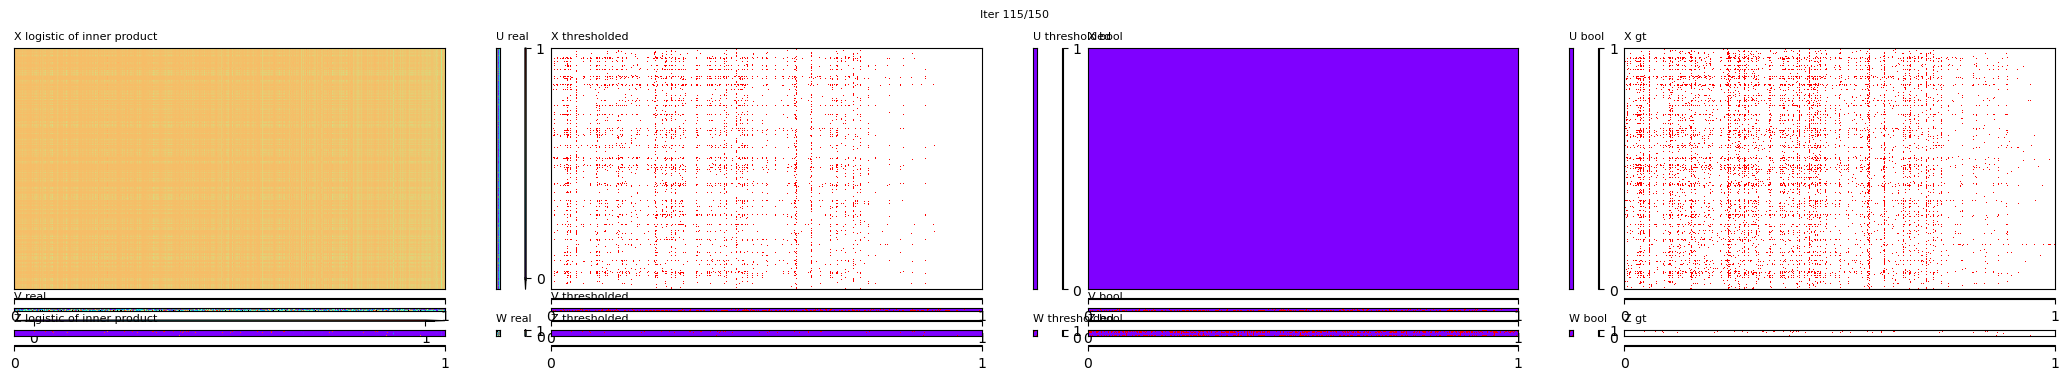

[INFO] Iter 116/150. Time: 0.8
[INFO] trn rmse: 0.71 tpr: 0.50 ppv: 1.00 acc: 0.97 f1: 0.66 loss: 20138.4 (change 0.12%)
[INFO] tst rmse: 0.71 tpr: 0.50 ppv: 1.00 acc: 0.97 f1: 0.66
[INFO] Iter 117/150. Time: 0.9
[INFO] trn rmse: 0.71 tpr: 0.50 ppv: 1.00 acc: 0.97 f1: 0.66 loss: 20183.2 (change 0.22%)
[INFO] tst rmse: 0.71 tpr: 0.50 ppv: 1.00 acc: 0.97 f1: 0.66
[INFO] Iter 118/150. Time: 0.6
[INFO] trn rmse: 0.71 tpr: 0.49 ppv: 1.00 acc: 0.97 f1: 0.66 loss: 20222.8 (change 0.20%)
[INFO] tst rmse: 0.71 tpr: 0.49 ppv: 1.00 acc: 0.97 f1: 0.66
[INFO] Iter 119/150. Time: 0.5
[INFO] trn rmse: 0.71 tpr: 0.49 ppv: 1.00 acc: 0.97 f1: 0.66 loss: 20266.0 (change 0.21%)
[INFO] tst rmse: 0.71 tpr: 0.49 ppv: 1.00 acc: 0.97 f1: 0.66
[INFO] Iter 120/150. Time: 0.5
[INFO] trn rmse: 0.71 tpr: 0.49 ppv: 1.00 acc: 0.97 f1: 0.66 loss: 20291.2 (change 0.12%)
[INFO] tst rmse: 0.71 tpr: 0.49 ppv: 1.00 acc: 0.97 f1: 0.66


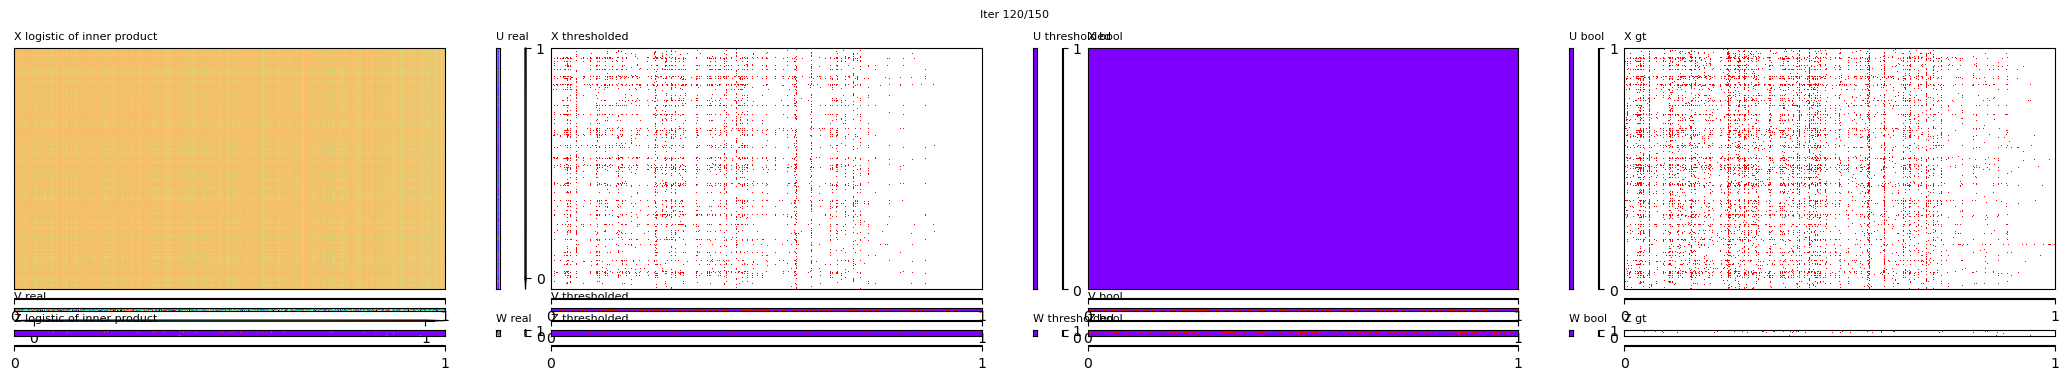

[INFO] Iter 121/150. Time: 8.8
[INFO] trn rmse: 0.71 tpr: 0.49 ppv: 1.00 acc: 0.97 f1: 0.66 loss: 20330.4 (change 0.19%)
[INFO] tst rmse: 0.71 tpr: 0.49 ppv: 1.00 acc: 0.97 f1: 0.66
[INFO] Iter 122/150. Time: 6.2
[INFO] trn rmse: 0.71 tpr: 0.49 ppv: 1.00 acc: 0.97 f1: 0.66 loss: 20376.8 (change 0.23%)
[INFO] tst rmse: 0.71 tpr: 0.49 ppv: 1.00 acc: 0.97 f1: 0.66
[INFO] Iter 123/150. Time: 22.0
[INFO] trn rmse: 0.71 tpr: 0.49 ppv: 1.00 acc: 0.97 f1: 0.66 loss: 20417.2 (change 0.20%)
[INFO] tst rmse: 0.71 tpr: 0.49 ppv: 1.00 acc: 0.97 f1: 0.66
[INFO] Iter 124/150. Time: 9.0
[INFO] trn rmse: 0.71 tpr: 0.49 ppv: 1.00 acc: 0.97 f1: 0.66 loss: 20453.2 (change 0.18%)
[INFO] tst rmse: 0.71 tpr: 0.49 ppv: 1.00 acc: 0.97 f1: 0.66
[INFO] Iter 125/150. Time: 9.1
[INFO] trn rmse: 0.72 tpr: 0.49 ppv: 1.00 acc: 0.97 f1: 0.66 loss: 20487.1 (change 0.17%)
[INFO] tst rmse: 0.72 tpr: 0.49 ppv: 1.00 acc: 0.97 f1: 0.66


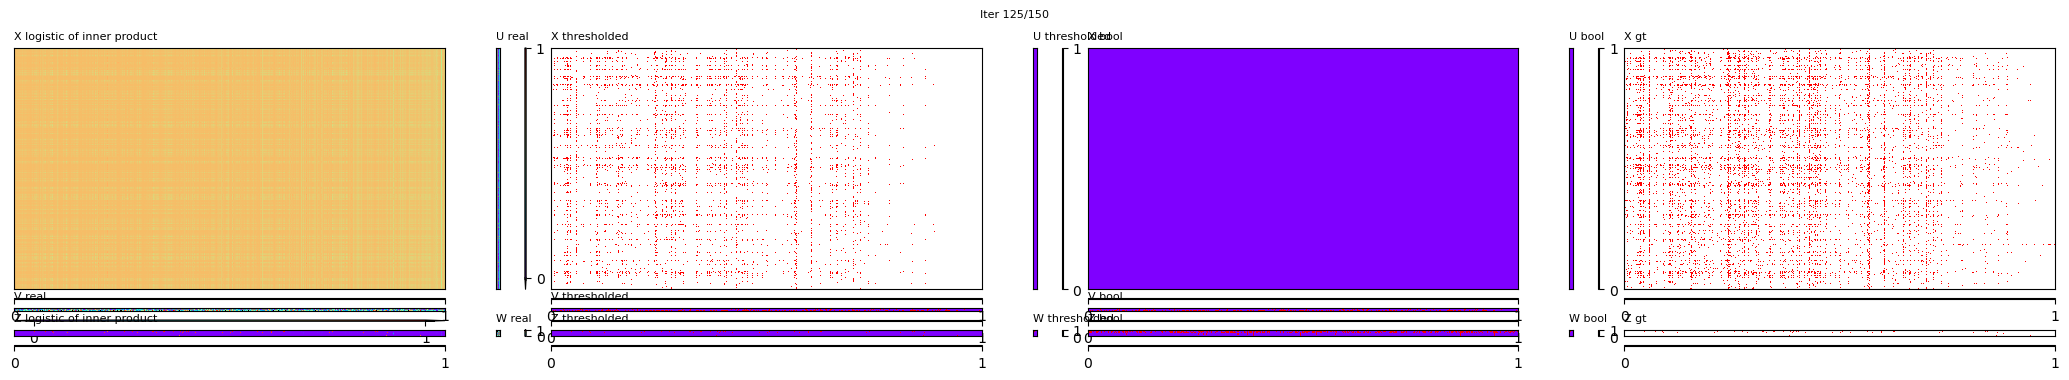

[INFO] Iter 126/150. Time: 5.7
[INFO] trn rmse: 0.72 tpr: 0.49 ppv: 1.00 acc: 0.97 f1: 0.66 loss: 20522.7 (change 0.17%)
[INFO] tst rmse: 0.72 tpr: 0.49 ppv: 1.00 acc: 0.97 f1: 0.66
[INFO] Iter 127/150. Time: 8.2
[INFO] trn rmse: 0.72 tpr: 0.49 ppv: 1.00 acc: 0.97 f1: 0.65 loss: 20573.9 (change 0.25%)
[INFO] tst rmse: 0.72 tpr: 0.49 ppv: 1.00 acc: 0.97 f1: 0.65
[INFO] Iter 128/150. Time: 2.1
[INFO] trn rmse: 0.72 tpr: 0.48 ppv: 1.00 acc: 0.97 f1: 0.65 loss: 20621.5 (change 0.23%)
[INFO] tst rmse: 0.72 tpr: 0.48 ppv: 1.00 acc: 0.97 f1: 0.65
[INFO] Iter 129/150. Time: 1.0
[INFO] trn rmse: 0.72 tpr: 0.48 ppv: 1.00 acc: 0.97 f1: 0.65 loss: 20657.5 (change 0.17%)
[INFO] tst rmse: 0.72 tpr: 0.48 ppv: 1.00 acc: 0.97 f1: 0.65
[INFO] Iter 130/150. Time: 0.5
[INFO] trn rmse: 0.72 tpr: 0.48 ppv: 1.00 acc: 0.97 f1: 0.65 loss: 20693.9 (change 0.18%)
[INFO] tst rmse: 0.72 tpr: 0.48 ppv: 1.00 acc: 0.97 f1: 0.65


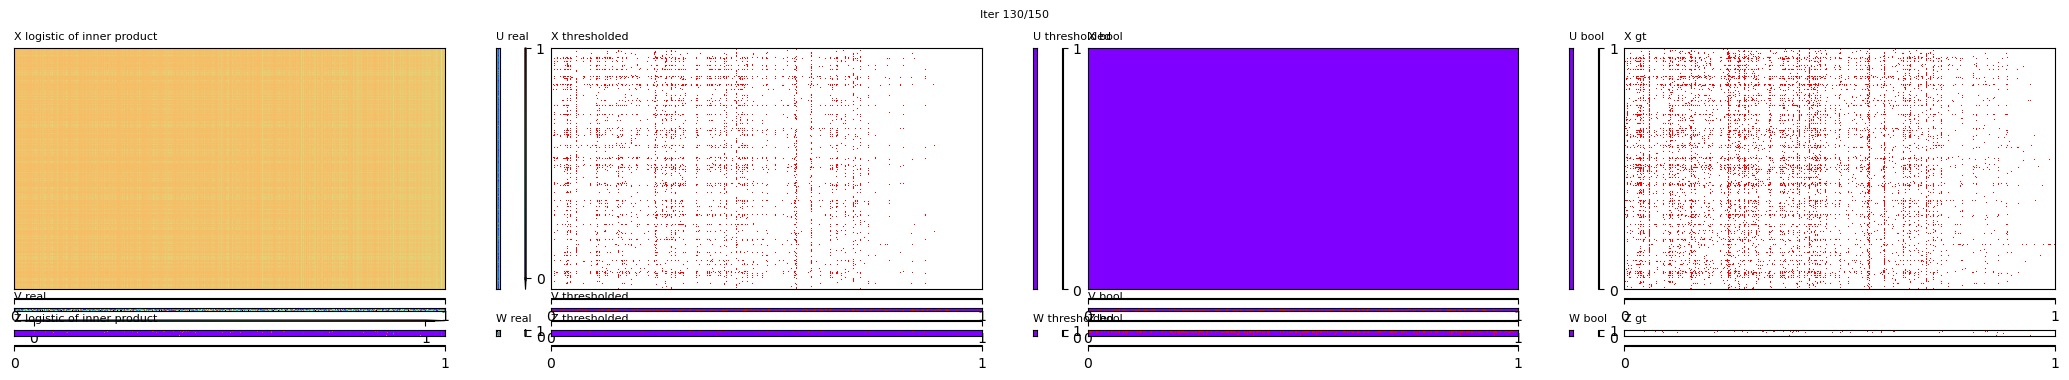

[INFO] Iter 131/150. Time: 0.5
[INFO] trn rmse: 0.72 tpr: 0.48 ppv: 1.00 acc: 0.97 f1: 0.65 loss: 20735.1 (change 0.20%)
[INFO] tst rmse: 0.72 tpr: 0.48 ppv: 1.00 acc: 0.97 f1: 0.65
[INFO] Iter 132/150. Time: 0.5
[INFO] trn rmse: 0.72 tpr: 0.48 ppv: 1.00 acc: 0.97 f1: 0.65 loss: 20779.5 (change 0.21%)
[INFO] tst rmse: 0.72 tpr: 0.48 ppv: 1.00 acc: 0.97 f1: 0.65
[INFO] Iter 133/150. Time: 0.5
[INFO] trn rmse: 0.72 tpr: 0.48 ppv: 1.00 acc: 0.97 f1: 0.65 loss: 20813.5 (change 0.16%)
[INFO] tst rmse: 0.72 tpr: 0.48 ppv: 1.00 acc: 0.97 f1: 0.65
[INFO] Iter 134/150. Time: 2.9
[INFO] trn rmse: 0.72 tpr: 0.48 ppv: 1.00 acc: 0.97 f1: 0.65 loss: 20859.1 (change 0.22%)
[INFO] tst rmse: 0.72 tpr: 0.48 ppv: 1.00 acc: 0.97 f1: 0.65
[INFO] Iter 135/150. Time: 1.8
[INFO] trn rmse: 0.72 tpr: 0.48 ppv: 1.00 acc: 0.97 f1: 0.65 loss: 20897.5 (change 0.18%)
[INFO] tst rmse: 0.72 tpr: 0.48 ppv: 1.00 acc: 0.97 f1: 0.65


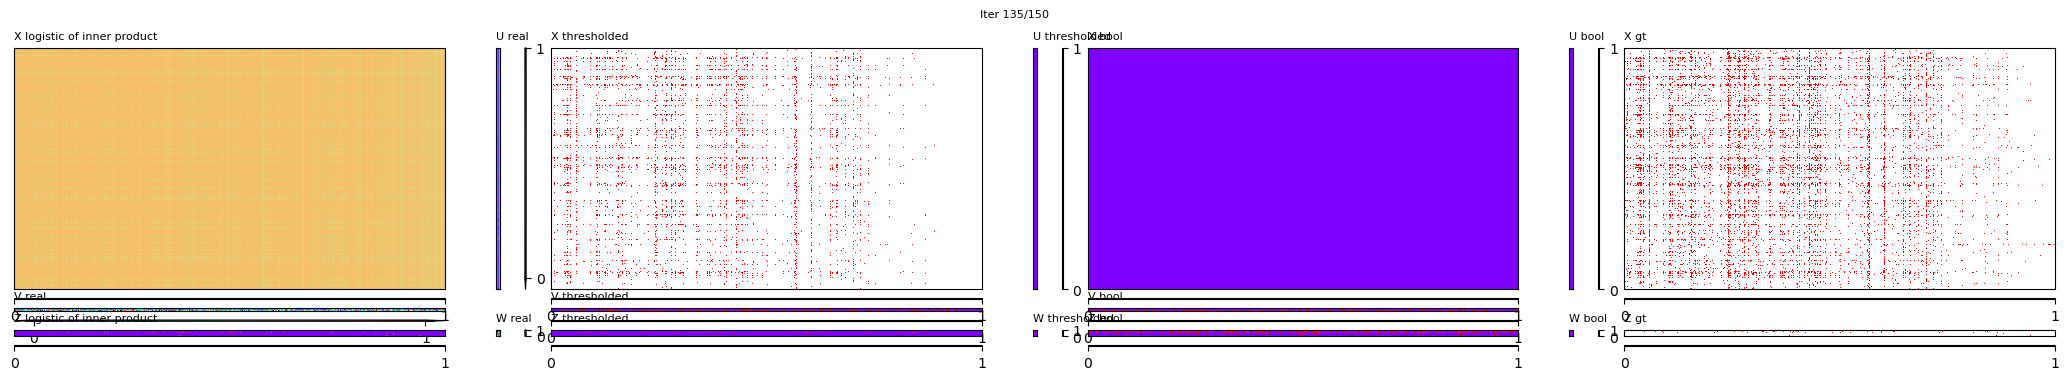

[INFO] Iter 136/150. Time: 1.0
[INFO] trn rmse: 0.72 tpr: 0.48 ppv: 1.00 acc: 0.97 f1: 0.65 loss: 20942.3 (change 0.21%)
[INFO] tst rmse: 0.72 tpr: 0.48 ppv: 1.00 acc: 0.97 f1: 0.65
[INFO] Iter 137/150. Time: 1.7
[INFO] trn rmse: 0.72 tpr: 0.48 ppv: 1.00 acc: 0.97 f1: 0.64 loss: 20989.5 (change 0.23%)
[INFO] tst rmse: 0.72 tpr: 0.48 ppv: 1.00 acc: 0.97 f1: 0.64
[INFO] Iter 138/150. Time: 1.5
[INFO] trn rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64 loss: 21041.9 (change 0.25%)
[INFO] tst rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64
[INFO] Iter 139/150. Time: 1.1
[INFO] trn rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64 loss: 21091.5 (change 0.24%)
[INFO] tst rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64
[INFO] Iter 140/150. Time: 1.0
[INFO] trn rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64 loss: 21131.9 (change 0.19%)
[INFO] tst rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64


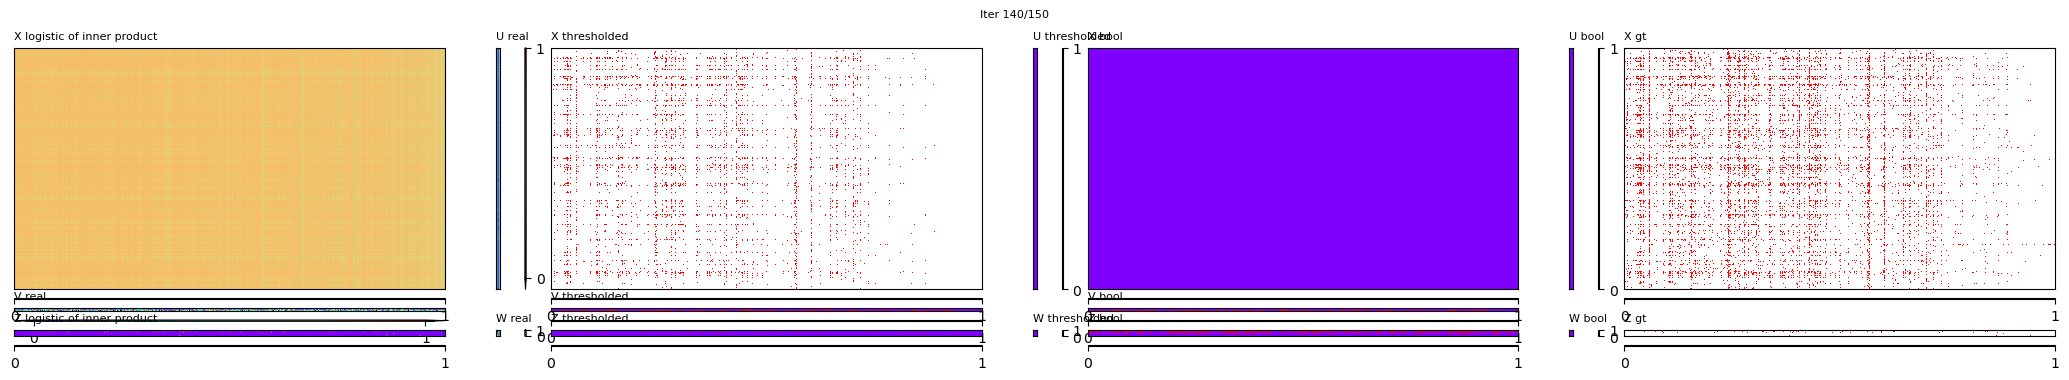

[INFO] Iter 141/150. Time: 0.6
[INFO] trn rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64 loss: 21171.9 (change 0.19%)
[INFO] tst rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64
[INFO] Iter 142/150. Time: 0.5
[INFO] trn rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64 loss: 21209.0 (change 0.18%)
[INFO] tst rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64
[INFO] Iter 143/150. Time: 0.5
[INFO] trn rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64 loss: 21256.2 (change 0.22%)
[INFO] tst rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64
[INFO] Iter 144/150. Time: 0.7
[INFO] trn rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64 loss: 21289.0 (change 0.15%)
[INFO] tst rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64
[INFO] Iter 145/150. Time: 0.5
[INFO] trn rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64 loss: 21337.0 (change 0.23%)
[INFO] tst rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64


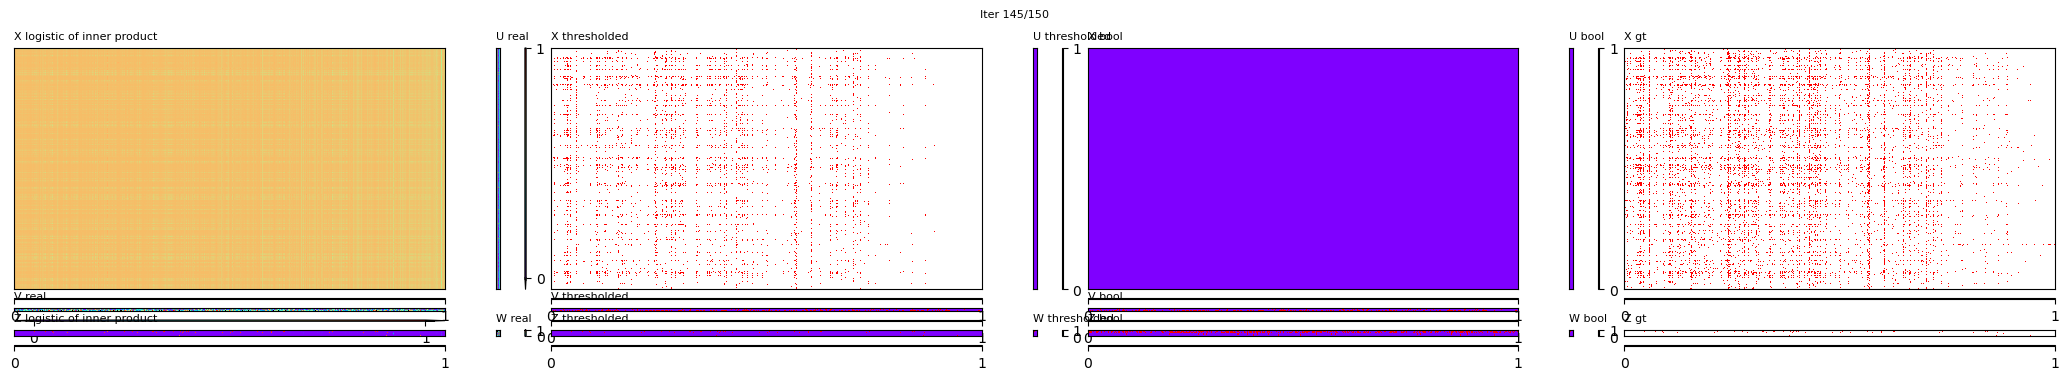

[INFO] Iter 146/150. Time: 0.5
[INFO] trn rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64 loss: 21384.2 (change 0.22%)
[INFO] tst rmse: 0.73 tpr: 0.47 ppv: 1.00 acc: 0.97 f1: 0.64
[INFO] Iter 147/150. Time: 0.5
[INFO] trn rmse: 0.73 tpr: 0.46 ppv: 1.00 acc: 0.97 f1: 0.63 loss: 21443.0 (change 0.27%)
[INFO] tst rmse: 0.73 tpr: 0.46 ppv: 1.00 acc: 0.97 f1: 0.63
[INFO] Iter 148/150. Time: 0.4
[INFO] trn rmse: 0.73 tpr: 0.46 ppv: 1.00 acc: 0.97 f1: 0.63 loss: 21481.4 (change 0.18%)
[INFO] tst rmse: 0.73 tpr: 0.46 ppv: 1.00 acc: 0.97 f1: 0.63
[INFO] Iter 149/150. Time: 0.5
[INFO] trn rmse: 0.73 tpr: 0.46 ppv: 1.00 acc: 0.97 f1: 0.63 loss: 21529.0 (change 0.22%)
[INFO] tst rmse: 0.73 tpr: 0.46 ppv: 1.00 acc: 0.97 f1: 0.63
[INFO] Iter 150/150. Time: 0.5
[INFO] trn rmse: 0.73 tpr: 0.46 ppv: 1.00 acc: 0.97 f1: 0.63 loss: 21585.4 (change 0.26%)
[INFO] tst rmse: 0.73 tpr: 0.46 ppv: 1.00 acc: 0.97 f1: 0.63


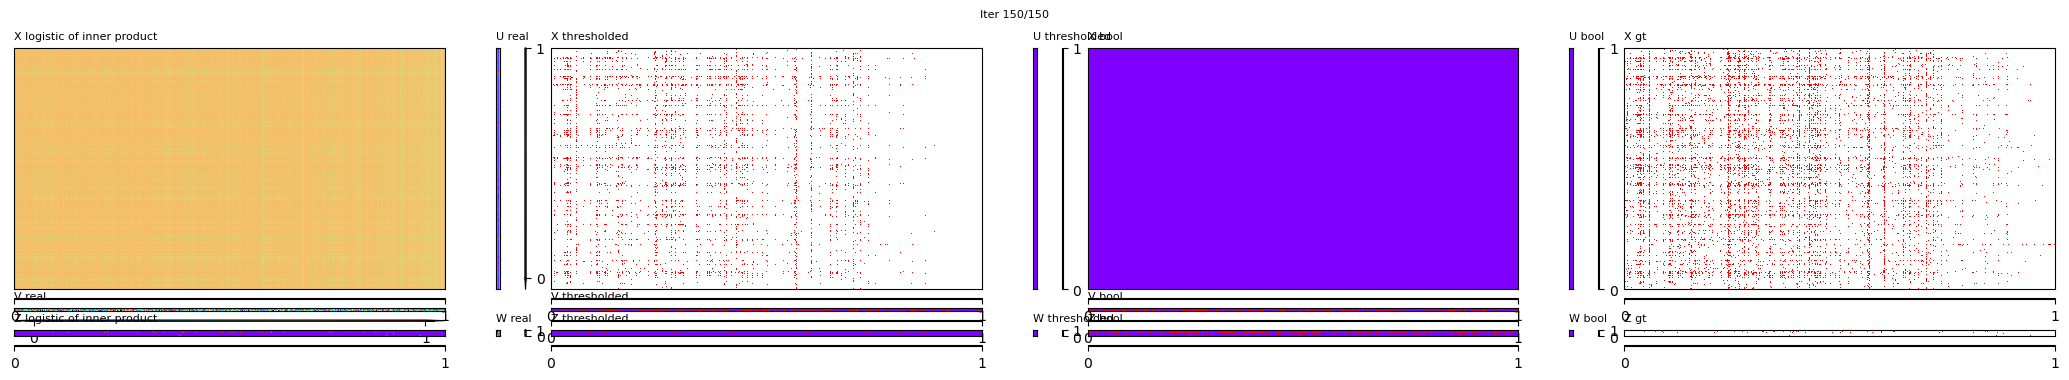

[INFO] RMSE: 0.7345
[INFO] Total Time: 359 s


In [8]:
[Xs_trn, Xs_tst, rc_schema, modes] = read_triple_data(args.train, args.test, args.user, args.item, args.link, args.boolean)

Xs_tst[0] = X

Xs_trn[0] = X
Xs_trn[1] = Y.T

if(args.verbose == 1):
    logging.basicConfig(level=logging.INFO, format='[%(levelname)s] %(message)s')
else:
    logging.basicConfig(level=logging.WARNING, format='[%(levelname)s] %(message)s')

logger = logging.getLogger()
[S, Ns] = get_config(Xs_trn, rc_schema)
alphas = string2list(args.alphas, len(modes))

logger.info('------------------- CMF -------------------')
logger.info('Data: Number of instnace for each entity = {}'.format(list(Ns)))
logger.info('Data: Training size = {}. Testing size = {}'.format(Xs_trn[0].size, Xs_tst[0].size))
logger.info('Settings: k = {}. reg = {}. lr = {}. alpha = {}. modes = {}.'.format(args.k, args.reg, args.lr, alphas, modes))

run_cmf(Xs_trn, Xs_tst, rc_schema, modes, alphas, args, logger)

In [9]:
rc_schema

array([[0, 1],
       [1, 2]])

: 

In [ ]:
# replace by netflix
from utils import sample

cache_path = "D:/OneDrive - Singapore Management University/cache/netflix_data_small.pickle"
X, factor_info = read_cache(cache_path)

idx_u, _, X = sample(X, axis=0, n_samples=1000, seed=3080)
display(X.shape)

idx_v, _, X = sample(X, axis=1, n_samples=500, seed=4060)
display(X.shape)

display(X)

from datasets import RatioSplit, NoSplit

# X_split = RatioSplit(X=X, test_size=0.2, seed=1000)

X_split = NoSplit(X)

In [ ]:
from datasets import NetflixGenreData

nfg_data = NetflixGenreData(small=True)

_, _, Z = sample(nfg_data.X, idx=idx_v, axis=1)

display(Z)

In [ ]:
import numpy as np

[Xs_trn, Xs_tst, rc_schema, modes] = read_triple_data(args.train, args.test, args.user, args.item, args.link, args.boolean)

Xs_tst[0] = X_split.X_test

Xs_trn[0] = X_split.X_train
Xs_trn[1] = Z.T

if(args.verbose == 1):
    logging.basicConfig(level=logging.INFO, format='[%(levelname)s] %(message)s')
else:
    logging.basicConfig(level=logging.WARNING, format='[%(levelname)s] %(message)s')

logger = logging.getLogger()
[S, Ns] = get_config(Xs_trn, rc_schema)
alphas = string2list(args.alphas, len(modes))

logger.info('------------------- CMF -------------------')
logger.info('Data: Number of instnace for each entity = {}'.format(list(Ns)))
logger.info('Data: Training size = {}. Testing size = {}'.format(Xs_trn[0].size, Xs_tst[0].size))
logger.info('Settings: k = {}. reg = {}. lr = {}. alpha = {}. modes = {}.'.format(args.k, args.reg, args.lr, alphas, modes))

run_cmf(Xs_trn, Xs_tst, rc_schema, modes, alphas, args, logger)